# Which are the States with the most natural disasters in the US?


What is my question:

-what kind of natural disasters exist in USA (fires, floods, tornados, mudslides, earthquakes, hurricanes etc)? Which ones are more frequent?

-Are those areas populated?

-If there is a type of a catastrophe that is a repeated phenomenon in a certain area / state? In that case, should there be state indemnity to compensate the losses of the local citizens? Should taxpayes pay for repeated catastrophic risks to people who insist living in an environment that they know for certain it will be destroyed?

I created my own dataset. Although I checked for official statistics, at Disasters | Data.gov, the available datasets were not clear and when I tried to open the pdf's, I got always the message: "Access denied". I emailed the Agency but so far, I have no answer.

Then I contacted the Federal Emergency Management Agency where they gave me access to the database: "Disaster declaration". Μy first thought was to scrape the pages but soon I realized that some terms were unknown to me. For instance, fires are categorized, some have a cetain type and name, hurricanes have names and so on, so not clear which values go where to the pandas dataframe. Due to time considerations, I thought to limit my research only to the natural disasters DECLARED in 2018 and fall 2017. I ended up with 102 entries.
While building the database, I had to search / google for the event in order to understand the type of disaster as in several cases the event is written in the examined database in the following manner: ex. Arizona 89 East Fire. Moreover, in some cases there were some numbers that I could not identify if it was a code for the state or the type of the disaster (ex. Texas 335 Fire (FM-5234)

One should be carefull because some events happened in 2015 but "declared" (term used by the Agency) much later -months, or even years as it is the case for Alaska-.

From the available findings, it seems that California has the most "natural disasters" and more specifically fires. Fire is also the most common type of disaster in USA for 2018 and part of 2017. 

It would have been nice to add the hectars that were destroyed and any sort of casualties for every disaster, as well as, the specific area in order to put it in a map.

After cell 38 start the illustrations. Before, is just scraping. 

In [1]:
import requests
raw_html = requests.get("https://www.fema.gov/disasters").content

In [2]:
print(type(raw_html))

<class 'bytes'>


In [3]:
from bs4 import BeautifulSoup

In [4]:
soup_doc = BeautifulSoup(raw_html, "html.parser")
print(type(soup_doc))

<class 'bs4.BeautifulSoup'>


In [5]:
print(soup_doc.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "//www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html dir="ltr" lang="en">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <link href="//www.fema.gov/profiles/fema_gov/themes/unicorn/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
   <link href="//www.fema.gov/disasters" rel="canonical"/>
   <link href="//www.fema.gov/disasters" rel="shortlink"/>
   <meta content="UCBT4DiagBHewe2zlRuSK_v_a9kmGxbjpTi9odc5NxY" name="google-site-verification">
    <title>
     Disasters | FEMA.gov
    </title>
    <link href="//www.fema.gov/sites/default/files/css/css_lQaZfjVpwP_oGNqdtWCSpJT1EMqXdMiU84ekLLxQnc4.css" media="all" rel="stylesheet" type="text/css"/>
    <link href="//www.fema.gov/sites/default/files/css/css_iu96zNnPZyQmyJ59SgMmMmxLHQSxx9b_WjiBuNi8

In [6]:
import re

In [7]:
soup_doc.find('div')

<div id="skip-link">
<a class="element-invisible element-focusable" href="#main-content">Skip to main content</a>
</div>

In [8]:
soup_doc.find('div class="views-field"')

In [9]:
find_links = soup_doc.find_all(class_="views-field")

In [10]:
find_links

[<div class="views-field views-field-disaster-listing-title"><a href="/disaster/5256">Oregon Garner Fire Complex  (FM-5256)</a></div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: July 15, 2018</div>,
 <div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on July 19, 2018</div>,
 <div class="views-field views-field-disaster-listing-title"><a href="/disaster/5255">Oregon Substation Fire (FM-5255)</a></div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: July 17, 2018</div>,
 <div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on July 18, 2018</div>,
 <div class="views-field views-field-disaster-listing-title"><a href="/disaster/4378">West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4378)</a></div>,
 <div class="views-field views-field-disaster-listing-inciden

In [11]:
find_links[0].find_all

<bound method Tag.find_all of <div class="views-field views-field-disaster-listing-title"><a href="/disaster/5256">Oregon Garner Fire Complex  (FM-5256)</a></div>>

In [12]:
find_links[0].a.text

'Oregon Garner Fire Complex  (FM-5256)'

In [13]:
for text in find_links:
    print(text)
    

<div class="views-field views-field-disaster-listing-title"><a href="/disaster/5256">Oregon Garner Fire Complex  (FM-5256)</a></div>
<div class="views-field views-field-disaster-listing-incident-date">Incident period: July 15, 2018</div>
<div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on July 19, 2018</div>
<div class="views-field views-field-disaster-listing-title"><a href="/disaster/5255">Oregon Substation Fire (FM-5255)</a></div>
<div class="views-field views-field-disaster-listing-incident-date">Incident period: July 17, 2018</div>
<div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on July 18, 2018</div>
<div class="views-field views-field-disaster-listing-title"><a href="/disaster/4378">West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4378)</a></div>
<div class="views-field views-field-disaster-listing-incident-date">Inciden

In [14]:
for row in find_links:
    print(row.a)

<a href="/disaster/5256">Oregon Garner Fire Complex  (FM-5256)</a>
None
None
<a href="/disaster/5255">Oregon Substation Fire (FM-5255)</a>
None
None
<a href="/disaster/4378">West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4378)</a>
None
None
<a href="/disaster/5253">Washington Ryegrass Coulee Fire  (FM-5253)</a>
None
None
<a href="/disaster/5252">California Holiday Fire (FM-5252)</a>
None
None
<a href="/disaster/5251">California West Fire (FM-5251)</a>
None
None
<a href="/disaster/4377">Texas Severe Storms And Flooding (DR-4377)</a>
None
None
<a href="/disaster/5250">California Klamathon Fire (FM-5250)</a>
None
None
<a href="/disaster/5249">Colorado Lake Christine Fire (FM-5249)</a>
None
None
<a href="/disaster/4376">Maryland Severe Storm And Flooding (DR-4376)</a>
None
None
<a href="/disaster/5248">Utah Dollar Ridge (FM-5248)</a>
None
None
<a href="/disaster/5247">Colorado Chateau Fire (FM-5247)</a>
None
None
<a href="/disaster/4375">Nebraska Severe Winter Storm a

In [15]:
for row in find_links:
    #if row is not None:
    #    print(row)
    if row.a is not None:
        print(row.a)
   
        

<a href="/disaster/5256">Oregon Garner Fire Complex  (FM-5256)</a>
<a href="/disaster/5255">Oregon Substation Fire (FM-5255)</a>
<a href="/disaster/4378">West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4378)</a>
<a href="/disaster/5253">Washington Ryegrass Coulee Fire  (FM-5253)</a>
<a href="/disaster/5252">California Holiday Fire (FM-5252)</a>
<a href="/disaster/5251">California West Fire (FM-5251)</a>
<a href="/disaster/4377">Texas Severe Storms And Flooding (DR-4377)</a>
<a href="/disaster/5250">California Klamathon Fire (FM-5250)</a>
<a href="/disaster/5249">Colorado Lake Christine Fire (FM-5249)</a>
<a href="/disaster/4376">Maryland Severe Storm And Flooding (DR-4376)</a>
<a href="/disaster/5248">Utah Dollar Ridge (FM-5248)</a>
<a href="/disaster/5247">Colorado Chateau Fire (FM-5247)</a>
<a href="/disaster/4375">Nebraska Severe Winter Storm and Straight-line Winds (DR-4375)</a>
<a href="/disaster/5246">Colorado Spring Creek Fire (FM-5246)</a>
<a href="/disaste

In [16]:
for row in find_links:
    #if row is not None:
    #    print(row)
    if row.a is not None:
        print(row.a.text)
        

Oregon Garner Fire Complex  (FM-5256)
Oregon Substation Fire (FM-5255)
West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4378)
Washington Ryegrass Coulee Fire  (FM-5253)
California Holiday Fire (FM-5252)
California West Fire (FM-5251)
Texas Severe Storms And Flooding (DR-4377)
California Klamathon Fire (FM-5250)
Colorado Lake Christine Fire (FM-5249)
Maryland Severe Storm And Flooding (DR-4376)
Utah Dollar Ridge (FM-5248)
Colorado Chateau Fire (FM-5247)
Nebraska Severe Winter Storm and Straight-line Winds (DR-4375)
Colorado Spring Creek Fire (FM-5246)
Massachusetts Severe Winter Storm And Flooding (DR-4372)
Oklahoma Wildfires (DR-4373)
Maryland Severe Storms And Flooding (DR-4374)
California Creek Fire (FM-5245)
California Pawnee Fire (FM-5244)
Oregon Graham Fire (FM-5243)


In [17]:
for row in find_links:
    #if row is not None:
    #    print(row)
    if row.a is not None:
        all_disasters = []
        regex_name = r"\>(\w\w) \("
        print(row.a)
        print(all_disasters)

<a href="/disaster/5256">Oregon Garner Fire Complex  (FM-5256)</a>
[]
<a href="/disaster/5255">Oregon Substation Fire (FM-5255)</a>
[]
<a href="/disaster/4378">West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4378)</a>
[]
<a href="/disaster/5253">Washington Ryegrass Coulee Fire  (FM-5253)</a>
[]
<a href="/disaster/5252">California Holiday Fire (FM-5252)</a>
[]
<a href="/disaster/5251">California West Fire (FM-5251)</a>
[]
<a href="/disaster/4377">Texas Severe Storms And Flooding (DR-4377)</a>
[]
<a href="/disaster/5250">California Klamathon Fire (FM-5250)</a>
[]
<a href="/disaster/5249">Colorado Lake Christine Fire (FM-5249)</a>
[]
<a href="/disaster/4376">Maryland Severe Storm And Flooding (DR-4376)</a>
[]
<a href="/disaster/5248">Utah Dollar Ridge (FM-5248)</a>
[]
<a href="/disaster/5247">Colorado Chateau Fire (FM-5247)</a>
[]
<a href="/disaster/4375">Nebraska Severe Winter Storm and Straight-line Winds (DR-4375)</a>
[]
<a href="/disaster/5246">Colorado Spring Cre

In [18]:
#for number in range(100)
    #for row in find_links:
        
        #if row.a is not None:
            #print(row.a.text)
        

In [19]:
url = "https://www.fema.gov/disasters?page="
for number in range(100):
    print(number)
    #url+

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [20]:
url = "https://www.fema.gov/disasters?page="
for number in range(100):
    print(url + str(number+1))


https://www.fema.gov/disasters?page=1
https://www.fema.gov/disasters?page=2
https://www.fema.gov/disasters?page=3
https://www.fema.gov/disasters?page=4
https://www.fema.gov/disasters?page=5
https://www.fema.gov/disasters?page=6
https://www.fema.gov/disasters?page=7
https://www.fema.gov/disasters?page=8
https://www.fema.gov/disasters?page=9
https://www.fema.gov/disasters?page=10
https://www.fema.gov/disasters?page=11
https://www.fema.gov/disasters?page=12
https://www.fema.gov/disasters?page=13
https://www.fema.gov/disasters?page=14
https://www.fema.gov/disasters?page=15
https://www.fema.gov/disasters?page=16
https://www.fema.gov/disasters?page=17
https://www.fema.gov/disasters?page=18
https://www.fema.gov/disasters?page=19
https://www.fema.gov/disasters?page=20
https://www.fema.gov/disasters?page=21
https://www.fema.gov/disasters?page=22
https://www.fema.gov/disasters?page=23
https://www.fema.gov/disasters?page=24
https://www.fema.gov/disasters?page=25
https://www.fema.gov/disasters?pag

In [21]:
url = "https://www.fema.gov/disasters?page="
list_of_events = []
for number in range(50):
    all_url = url + str(number+1) 
    raw_html = requests.get(all_url).content
    soup_doc = BeautifulSoup(raw_html, "html.parser")
    find_links = soup_doc.find_all(class_="views-field")
   
    for row in find_links:
        if row.a is not None:
            print(row.a.text)
            list_of_events.append(row.a.text)
    
    
    

Oregon Graham Fire (FM-5243)
Nevada Upper Colony Fire (FM-5242)
Wyoming Badger Creek Fire (FM-5241)
Alaska Severe Storm (DR-4369)
New Hampshire Severe Storm And Flooding (DR-4370)
New Hampshire Severe Winter Storm And Snowstorm (DR-4371)
New Jersey Severe Winter Storm And Snowstorm (DR-4368)
New Mexico Soldier Canyon Fire (FM-5240)
New Mexico Ute Park Fire  (FM-5239)
New Mexico Ute Park Fire  (FM-5239)
Maine Severe Storm And Flooding (DR-4367)
Arizona 89 East Fire (FM-5238)
Hawaii Kilauea Volcanic Eruption And Earthquakes (DR-4366)
Hawaii Severe Storms, Flooding, Landslides, And Mudslides (DR-4365)
North Carolina Tornado And Severe Storms (DR-4364)
Indiana Severe Storms And Flooding (DR-4363)
Texas McDannald Fire (FM-5237)
Arizona Tinder Fire (FM-5236)
Alabama Severe Storms And Tornadoes (DR-4362)
Kentucky Severe Storms, Tornadoes, Flooding, Landslides, And Mudslides (DR-4361)
Texas Mcclellan Fire (FM-5235)
West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4359)
Ohio

California Severe Winter Storms, Flooding, and Mudslides (DR-4305)
Oklahoma NW Oklahoma Wildfire Outbreak Complex (FM-5177)
Kansas Comanche County Fire (FM-5176)
Kansas Rooks County Fire (FM-5175)
Kansas Ness County Fire (FM-5174)
Kansas Ford County Fire Complex (FM-5173)
Kansas Ellsworth-Lincoln-Russell Fire Complex (FM-5172)
Kansas Clark County Fire (FM-5171)
Kansas Highland Hills Fire (FM-5170)
Oklahoma 141st Fire (FM-5169)
Kansas Severe Winter Storm (DR-4304)
Nevada Severe Winter Storms, Flooding, and Mudslides (DR-4303)
Hoopa Valley Tribe Severe Winter Storm (DR-4302)
California Potential Failure of the Emergency Spillway at Lake Oroville Dam (EM-3381)
California Severe Winter Storms, Flooding, and Mudslides (DR-4301)
Oklahoma OKC Fire Complex (FM-5168)
Louisiana Severe Storms, Tornadoes, and Straight-line Winds (DR-4300)
Oklahoma Severe Winter Storm (DR-4299)
South Dakota Severe Winter Storm (DR-4298)
Georgia Severe Storms, Tornadoes, and Straight-line Winds (DR-4297)
Mississippi

Arkansas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4226)
Nebraska Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4225)
Arizona Kearney River Fire (FM-5086)
Alaska Card Street Fire (FM-5085)
Alaska Sockeye Fire (FM-5084)
Guam Typhoon Dolphin (DR-4224)
Texas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4223)
Oklahoma Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4222)
West Virginia Severe Storms, Flooding, Landslides, and Mudslides (DR-4221)
West Virginia Severe Storms, Flooding, Landslides, and Mudslides (DR-4220)
West Virginia Severe Storms, Flooding, Landslides, and Mudslides (DR-4219)
Kentucky Severe Winter Storm, Snowstorm, Flooding, Landslides, and Mudslides (DR-4218)
Kentucky Severe Storms, Tornadoes, Flooding, Landslides, and Mudslides (DR-4217)
Kentucky Severe Winter Storms, Snowstorms, Flooding, Landslides, and Mudslides (DR-4216)
Georgia Severe Winter Storm (DR-4215)
Massachusetts Severe Winter Storm, 

Illinois Severe Storms, Straight-Line Winds and Flooding (DR-4116)
California Springs Fire (FM-5024)
California Summit Fire (FM-5023)
Iowa Severe Winter Storm (DR-4114)
Minnesota Severe Winter Storm (DR-4113)
North Dakota Flooding (EM-3364)
Kansas Snowstorm (DR-4112)
New York Severe Winter Storm and Snowstorm (DR-4111)
Texas Explosion (EM-3363)
Massachusetts Severe Winter Storm, Snowstorm, and Flooding (DR-4110)
Massachusetts Explosions (EM-3362)
Oklahoma Severe Winter Storm and Snowstorm (DR-4109)
Maine Winter Storm, Snow Storm, Flooding (DR-4108)
Rhode Island Severe Winter Storm and Snowstorm (DR-4107)
Connecticut Severe Winter Storm and Snowstorm (DR-4106)
New Hampshire Severe Winter Storm and Snowstorm (DR-4105)
Arizona Severe Freeze (DR-4104)
Eastern Band of Cherokee Indians Severe Storms, Flooding, Landslides, and Mudslides (DR-4103)
Louisiana Severe Storms and Flooding (DR-4102)
Mississippi Severe Storms, Tornadoes, and Flooding (DR-4101)
Connecticut Severe Winter Storm (EM-3361

Delaware Hurricane Irene (EM-3336)
District of Columbia (DC) Hurricane Irene (EM-3337)
Puerto Rico Hurricane Irene (DR-4017)
Virginia Hurricane Irene (EM-3329)
Massachusetts Hurricane Irene (EM-3330)
Connecticut Hurricane Irene (EM-3331)
New Jersey Hurricane Irene (EM-3332)
New Hampshire Hurricane Irene (EM-3333)
Rhode Island Hurricane Irene (EM-3334)
Maryland Hurricane Irene (EM-3335)
New York Hurricane Irene (EM-3328)
North Carolina Hurricane Irene (EM-3327)
Iowa Severe Storms, Straight-Line Winds, and Flooding (DR-4016)
Puerto Rico Hurricane Irene (EM-3326)
Louisiana Flooding (DR-4015)
Texas Horseshoe Fire (FM-2949)
Missouri Flooding (DR-4012)
Nebraska Flooding (DR-4013)
Nebraska Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4014)
Oklahoma Cedar Lane Fire (FM-2948)
Oklahoma 265th West Fire (FM-2946)
Oklahoma Cleveland-Mannford Fire Complex (FM-2947)
Utah Flooding (DR-4011)
Oklahoma Coffee Creek Fire (FM-2945)
Oklahoma Anderson Road Fire (FM-2942)
Oklahoma Regency F

Virgin Islands Severe Storms, Flooding, Mudslides, and Landslides associated with Tropical Storm Otto (DR-1948)
South Dakota Severe Storms and Flooding (DR-1947)
Puerto Rico Severe Storms, Flooding, Mudslides, and Landslides associated with Tropical Storm Otto (DR-1946)
Wisconsin Severe Storms and Flooding (DR-1944)
Nebraska Severe Storms, Flooding, Tornado, and Straight-line Winds (DR-1945)
New York Severe Storms, Tornadoes, and Straight-line Winds (DR-1943)
North Carolina Severe Storms, Flooding, and Straight-line Winds associated with the remnants of Tropical Storm Nicole (DR-1942)
Minnesota Severe Storms and Flooding (DR-1941)
Arizona Severe Storms and Flooding (DR-1940)
Virgin Islands Hurricane Earl (DR-1939)
South Dakota Severe Storms and Flooding (DR-1938)
Utah Machine Gun Fire (FM-2859)
California Canyon Fire (FM-2858)
Tennessee Severe Storms and Flooding (DR-1937)
New Mexico Severe Storms and Flooding (DR-1936)
Colorado Reservoir Fire (FM-2857)
California Glenview Fire (FM-285

In [22]:
list_of_events

['Oregon Graham Fire (FM-5243)',
 'Nevada Upper Colony Fire (FM-5242)',
 'Wyoming Badger Creek Fire (FM-5241)',
 'Alaska Severe Storm (DR-4369)',
 'New Hampshire Severe Storm And Flooding (DR-4370)',
 'New Hampshire Severe Winter Storm And Snowstorm (DR-4371)',
 'New Jersey Severe Winter Storm And Snowstorm (DR-4368)',
 'New Mexico Soldier Canyon Fire (FM-5240)',
 'New Mexico Ute Park Fire  (FM-5239)',
 'New Mexico Ute Park Fire  (FM-5239)',
 'Maine Severe Storm And Flooding (DR-4367)',
 'Arizona 89 East Fire (FM-5238)',
 'Hawaii Kilauea Volcanic Eruption And Earthquakes (DR-4366)',
 'Hawaii Severe Storms, Flooding, Landslides, And Mudslides (DR-4365)',
 'North Carolina Tornado And Severe Storms (DR-4364)',
 'Indiana Severe Storms And Flooding (DR-4363)',
 'Texas McDannald Fire (FM-5237)',
 'Arizona Tinder Fire (FM-5236)',
 'Alabama Severe Storms And Tornadoes (DR-4362)',
 'Kentucky Severe Storms, Tornadoes, Flooding, Landslides, And Mudslides (DR-4361)',
 'Texas Mcclellan Fire (FM-523

In [23]:
url = "https://www.fema.gov/disasters?page="
list_of_events = []
for number in range(50):
    all_url = url + str(number+1) 
    raw_html = requests.get(all_url).content
    soup_doc = BeautifulSoup(raw_html, "html.parser")
    find_links = soup_doc.find_all(class_="views-field")
   
    for row in find_links:
        if row.a is not None:
            dataframe_first = {}
            print(row.a.text)
            #regex_region = r":\'^([\w-]+\s\w+) "
            #dataframe_first['region']= re.findall(regex_region, row.text)[0]
            #regex_type_of_disaster = r" (.*) [(])"
            #dataframe_first['type_of_disaster'] = re.findall(regex_year, row.text)[0]
            list_of_events.append(dictionary)
            
             #for incident in incidents:
             #if incident is not None:
            # dictionary = {}
            #print(incident.text)
            #regex_month = r": (.*) \d"
            #dictionary['month']= re.findall(regex_month, incident.text)[0]
            #regex_year = r"(\d\d\d\d)$"
            #dictionary['year'] = re.findall(regex_year, incident.text)[0]
            #list_of_incidents.append(dictionary)
    
    

Oregon Graham Fire (FM-5243)


NameError: name 'dictionary' is not defined

In [24]:
#Now I want to scrape the second line: "Incident period: April 15, 2018"
soup_doc.find('div')

<div id="skip-link">
<a class="element-invisible element-focusable" href="#main-content">Skip to main content</a>
</div>

In [25]:
find_links

[<div class="views-field views-field-disaster-listing-title"><a href="/node/331983">Oregon Graham Fire (FM-5243)</a></div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: June 21, 2018</div>,
 <div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on June 22, 2018</div>,
 <div class="views-field views-field-disaster-listing-title"><a href="/disaster/5242">Nevada Upper Colony Fire (FM-5242)</a></div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: June 17, 2018</div>,
 <div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on June 17, 2018</div>,
 <div class="views-field views-field-disaster-listing-title"><a href="/disaster/5241">Wyoming Badger Creek Fire (FM-5241)</a></div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: June 11, 2018</div>,
 <

In [26]:
#careful: inside the same div there is the second line with the date I am searching, so I need to find a way to go to the same 
#line, with the same class. So I do not need this "find_all_events".

In [27]:
for text in find_links:
    print(text)
    

<div class="views-field views-field-disaster-listing-title"><a href="/node/331983">Oregon Graham Fire (FM-5243)</a></div>
<div class="views-field views-field-disaster-listing-incident-date">Incident period: June 21, 2018</div>
<div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on June 22, 2018</div>
<div class="views-field views-field-disaster-listing-title"><a href="/disaster/5242">Nevada Upper Colony Fire (FM-5242)</a></div>
<div class="views-field views-field-disaster-listing-incident-date">Incident period: June 17, 2018</div>
<div class="views-field views-field-disaster-listing-declaration-date">Fire Management Assistance Declaration declared on June 17, 2018</div>
<div class="views-field views-field-disaster-listing-title"><a href="/disaster/5241">Wyoming Badger Creek Fire (FM-5241)</a></div>
<div class="views-field views-field-disaster-listing-incident-date">Incident period: June 11, 2018</div>
<div class="views-

In [28]:
for row in find_links:
    print(row.text)  

Oregon Graham Fire (FM-5243)
Incident period: June 21, 2018
Fire Management Assistance Declaration declared on June 22, 2018
Nevada Upper Colony Fire (FM-5242)
Incident period: June 17, 2018
Fire Management Assistance Declaration declared on June 17, 2018
Wyoming Badger Creek Fire (FM-5241)
Incident period: June 11, 2018
Fire Management Assistance Declaration declared on June 11, 2018
Alaska Severe Storm (DR-4369)
Incident period: December 04, 2017
Major Disaster Declaration declared on June 08, 2018
New Hampshire Severe Storm And Flooding (DR-4370)
Incident period: March 02, 2018 to March 08, 2018
Major Disaster Declaration declared on June 08, 2018
New Hampshire Severe Winter Storm And Snowstorm (DR-4371)
Incident period: March 13, 2018 to March 14, 2018
Major Disaster Declaration declared on June 08, 2018
New Jersey Severe Winter Storm And Snowstorm (DR-4368)
Incident period: March 06, 2018 to March 07, 2018
Major Disaster Declaration declared on June 08, 2018
New Mexico Soldier Can

In [29]:
soup_doc.find_all(class_='views-field-disaster-listing-incident-date')

[<div class="views-field views-field-disaster-listing-incident-date">Incident period: June 21, 2018</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: June 17, 2018</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: June 11, 2018</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: December 04, 2017</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: March 02, 2018 to March 08, 2018</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: March 13, 2018 to March 14, 2018</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: March 06, 2018 to March 07, 2018</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident period: June 07, 2018</div>,
 <div class="views-field views-field-disaster-listing-incident-date">Incident perio

In [30]:
incidents=soup_doc.find_all(class_='views-field-disaster-listing-incident-date')

In [31]:
for incident in incidents:
    print(incident.text)

Incident period: June 21, 2018
Incident period: June 17, 2018
Incident period: June 11, 2018
Incident period: December 04, 2017
Incident period: March 02, 2018 to March 08, 2018
Incident period: March 13, 2018 to March 14, 2018
Incident period: March 06, 2018 to March 07, 2018
Incident period: June 07, 2018
Incident period: May 31, 2018
Incident period: May 31, 2018
Incident period: March 02, 2018 to March 08, 2018
Incident period: May 11, 2018
Incident period: May 03, 2018
Incident period: April 13, 2018 to April 16, 2018
Incident period: April 15, 2018
Incident period: February 14, 2018 to March 04, 2018
Incident period: May 02, 2018
Incident period: April 27, 2018
Incident period: March 19, 2018 to March 20, 2018
Incident period: February 21, 2018 to March 21, 2018


In [32]:
url = "https://www.fema.gov/disasters?page="
list_of_incidents = []
for number in range(50):
    all_url = url + str(number+1) 
    raw_html = requests.get(all_url).content
    soup_doc = BeautifulSoup(raw_html, "html.parser")
    incidents=soup_doc.find_all(class_='views-field-disaster-listing-incident-date')
   
    for incident in incidents:
        if incident is not None:
            dictionary = {}
            print(incident.text)
            regex_month = r": (.*) \d"
            dictionary['month']= re.findall(regex_month, incident.text)[0]
            regex_year = r"(\d\d\d\d)$"
            dictionary['year'] = re.findall(regex_year, incident.text)[0]
            list_of_incidents.append(dictionary)
    
    

Incident period: June 21, 2018
Incident period: June 17, 2018
Incident period: June 11, 2018
Incident period: December 04, 2017
Incident period: March 02, 2018 to March 08, 2018
Incident period: March 13, 2018 to March 14, 2018
Incident period: March 06, 2018 to March 07, 2018
Incident period: June 07, 2018
Incident period: May 31, 2018
Incident period: May 31, 2018
Incident period: March 02, 2018 to March 08, 2018
Incident period: May 11, 2018
Incident period: May 03, 2018
Incident period: April 13, 2018 to April 16, 2018
Incident period: April 15, 2018
Incident period: February 14, 2018 to March 04, 2018
Incident period: May 02, 2018
Incident period: April 27, 2018
Incident period: March 19, 2018 to March 20, 2018
Incident period: February 21, 2018 to March 21, 2018
Incident period: April 17, 2018
Incident period: February 14, 2018 to February 20, 2018
Incident period: February 14, 2018 to February 25, 2018
Incident period: April 14, 2018
Incident period: April 13, 2018
Incident peri

Incident period: April 28, 2017 to May 03, 2017
Incident period: April 26, 2017 to May 19, 2017
Incident period: June 11, 2017
Incident period: April 28, 2017 to May 11, 2017
Incident period: March 14, 2017 to March 15, 2017
Incident period: April 28, 2017 to May 02, 2017
Incident period: May 23, 2017
Incident period: April 30, 2017
Incident period: March 06, 2017 to March 28, 2017
Incident period: May 08, 2017
Incident period: February 08, 2017 to February 11, 2017
Incident period: April 21, 2017
Incident period: April 21, 2017
Incident period: April 20, 2017
Incident period: February 05, 2017 to February 27, 2017
Incident period: February 07, 2017 to February 27, 2017
Incident period: January 30, 2017 to February 22, 2017
Incident period: February 01, 2017 to February 23, 2017
Incident period: February 05, 2017 to February 22, 2017
Incident period: February 06, 2017 to February 07, 2017
Incident period: January 18, 2017 to January 23, 2017
Incident period: March 06, 2017
Incident per

Incident period: May 07, 2015 to June 15, 2015
Incident period: May 06, 2015 to June 17, 2015
Incident period: June 17, 2015 to June 27, 2015
Incident period: June 15, 2015
Incident period: June 15, 2015
Incident period: May 13, 2015 to May 16, 2015
Incident period: May 04, 2015 to June 22, 2015
Incident period: May 05, 2015 to June 22, 2015
Incident period: April 13, 2015 to April 15, 2015
Incident period: April 08, 2015 to April 11, 2015
Incident period: April 03, 2015 to April 05, 2015
Incident period: March 03, 2015 to March 09, 2015
Incident period: April 02, 2015 to April 17, 2015
Incident period: February 15, 2015 to February 22, 2015
Incident period: February 15, 2015 to February 17, 2015
Incident period: January 26, 2015 to January 28, 2015
Incident period: January 26, 2015 to January 28, 2015
Incident period: January 26, 2015 to January 28, 2015
Incident period: February 15, 2015 to February 22, 2015
Incident period: March 03, 2015 to March 14, 2015
Incident period: January 2

Incident period: February 08, 2013 to February 11, 2013
Incident period: December 25, 2012 to December 26, 2012
Incident period: October 26, 2012 to November 08, 2012
Incident period: October 29, 2012 to October 30, 2012
Incident period: October 27, 2012 to November 08, 2012
Incident period: October 26, 2012 to October 31, 2012
Incident period: October 26, 2012 to November 08, 2012
Incident period: September 15, 2012 to September 30, 2012
Incident period: October 29, 2012 to November 08, 2012
Incident period: October 26, 2012 to November 08, 2012
Incident period: October 26, 2012 to November 04, 2012
Incident period: October 27, 2012 to November 08, 2012
Incident period: September 11, 2012
Incident period: October 26, 2012 to October 31, 2012
Incident period: October 29, 2012 to November 08, 2012
Incident period: October 26, 2012 to November 01, 2012
Incident period: October 26, 2012 to October 31, 2012
Incident period: October 27, 2012 to November 08, 2012
Incident period: October 26,

Incident period: August 05, 2011 to August 10, 2011
Incident period: August 07, 2011 to August 13, 2011
Incident period: April 18, 2011 to July 16, 2011
Incident period: August 04, 2011 to August 10, 2011
Incident period: August 02, 2011 to August 08, 2011
Incident period: August 02, 2011 to August 08, 2011
Incident period: August 02, 2011 to August 08, 2011
Incident period: August 01, 2011 to August 03, 2011
Incident period: May 19, 2011 to June 04, 2011
Incident period: July 01, 2011 to July 11, 2011
Incident period: July 26, 2011 to July 29, 2011
Incident period: June 19, 2011 to June 23, 2011
Incident period: May 26, 2011 to May 30, 2011
Incident period: May 18, 2011 to July 08, 2011
Incident period: June 18, 2011 to June 24, 2011
Incident period: July 15, 2011 to July 18, 2011
Incident period: July 15, 2011 to July 20, 2011
Incident period: May 20, 2011 to June 08, 2011
Incident period: April 04, 2011 to May 15, 2011
Incident period: April 25, 2011 to April 28, 2011
Incident perio

Incident period: August 26, 2010 to August 31, 2010
Incident period: August 26, 2010 to September 03, 2010
Incident period: August 24, 2010 to August 29, 2010
Incident period: July 19, 2010 to August 07, 2010
Incident period: June 12, 2010 to July 31, 2010
Incident period: July 20, 2010 to July 24, 2010
Incident period: June 07, 2010 to July 21, 2010
Incident period: June 30, 2010 to August 14, 2010
Incident period: July 29, 2010 to August 03, 2010
Incident period: June 16, 2010 to June 24, 2010
Incident period: June 01, 2010 to August 31, 2010
Incident period: May 12, 2010 to May 13, 2010
Incident period: July 26, 2010 to July 30, 2010
Incident period: July 27, 2010 to August 02, 2010
Incident period: June 02, 2010 to June 10, 2010
Incident period: June 13, 2010 to June 15, 2010
Incident period: July 17, 2010 to July 30, 2010
Incident period: July 18, 2010 to July 21, 2010
Incident period: June 01, 2010 to August 29, 2010
Incident period: June 04, 2010 to June 18, 2010


In [33]:
list_of_incidents

[{'month': 'June 21,', 'year': '2018'},
 {'month': 'June 17,', 'year': '2018'},
 {'month': 'June 11,', 'year': '2018'},
 {'month': 'December 04,', 'year': '2017'},
 {'month': 'March 02, 2018 to March 08,', 'year': '2018'},
 {'month': 'March 13, 2018 to March 14,', 'year': '2018'},
 {'month': 'March 06, 2018 to March 07,', 'year': '2018'},
 {'month': 'June 07,', 'year': '2018'},
 {'month': 'May 31,', 'year': '2018'},
 {'month': 'May 31,', 'year': '2018'},
 {'month': 'March 02, 2018 to March 08,', 'year': '2018'},
 {'month': 'May 11,', 'year': '2018'},
 {'month': 'May 03,', 'year': '2018'},
 {'month': 'April 13, 2018 to April 16,', 'year': '2018'},
 {'month': 'April 15,', 'year': '2018'},
 {'month': 'February 14, 2018 to March 04,', 'year': '2018'},
 {'month': 'May 02,', 'year': '2018'},
 {'month': 'April 27,', 'year': '2018'},
 {'month': 'March 19, 2018 to March 20,', 'year': '2018'},
 {'month': 'February 21, 2018 to March 21,', 'year': '2018'},
 {'month': 'April 17,', 'year': '2018'},


In [34]:
# Ι it was not a good idea to scrape in a different for loop 
#the Region of the incident and the date of the incident although they are in two different lines on the website.
#but the below for loop is wrong as well as I try to add in the same for loop 2 different scrapings.

url = "https://www.fema.gov/disasters?page="
list_of_events = []
#list_of_incidents = []
for number in range(50):
    all_url = url + str(number+1) 
    raw_html = requests.get(all_url).content
    soup_doc = BeautifulSoup(raw_html, "html.parser")
    find_links = soup_doc.find_all(class_="views-field")
    incidents=soup_doc.find_all(class_='views-field-disaster-listing-incident-date')
    for incident in incidents:
        if incident is not None:
            dictionary = {}
            print(incident.text)
            regex_month = r": (.*) \d"
            dictionary['month']= re.findall(regex_month, incident.text)[0]
            regex_year = r"(\d\d\d\d)$"
            dictionary['year'] = re.findall(regex_year, incident.text)[0]
            list_of_incidents.append(dictionary)
            for row in find_links:
                if row.a is not None:
                    print(row.a.text)
                    list_of_events.append(row.a.text)
    

Incident period: June 21, 2018
Oregon Graham Fire (FM-5243)
Nevada Upper Colony Fire (FM-5242)
Wyoming Badger Creek Fire (FM-5241)
Alaska Severe Storm (DR-4369)
New Hampshire Severe Storm And Flooding (DR-4370)
New Hampshire Severe Winter Storm And Snowstorm (DR-4371)
New Jersey Severe Winter Storm And Snowstorm (DR-4368)
New Mexico Soldier Canyon Fire (FM-5240)
New Mexico Ute Park Fire  (FM-5239)
New Mexico Ute Park Fire  (FM-5239)
Maine Severe Storm And Flooding (DR-4367)
Arizona 89 East Fire (FM-5238)
Hawaii Kilauea Volcanic Eruption And Earthquakes (DR-4366)
Hawaii Severe Storms, Flooding, Landslides, And Mudslides (DR-4365)
North Carolina Tornado And Severe Storms (DR-4364)
Indiana Severe Storms And Flooding (DR-4363)
Texas McDannald Fire (FM-5237)
Arizona Tinder Fire (FM-5236)
Alabama Severe Storms And Tornadoes (DR-4362)
Kentucky Severe Storms, Tornadoes, Flooding, Landslides, And Mudslides (DR-4361)
Incident period: June 17, 2018
Oregon Graham Fire (FM-5243)
Nevada Upper Colony

American Samoa Tropical Storm Gita (DR-4357)
American Samoa Tropical Storm Gita (EM-3397)
Vermont Severe Storm And Flooding (DR-4356)
New Hampshire Severe Storm And Flooding (DR-4355)
Maine Severe Storm And Flooding (DR-4354)
California Wildfires, Flooding, Mudflows, And Debris Flows (DR-4353)
Northern Mariana Islands Typhoon Soudelor (DR-4235)
Pueblo of Acoma Severe Storms And Flooding (DR-4352)
Alaska Severe Storm (DR-4351)
South Dakota Legion Lake Fire (FM-5229)
California Wildfires (EM-3396)
Incident period: February 09, 2018 to February 14, 2018
Texas Mcclellan Fire (FM-5235)
West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4359)
Ohio Severe Storms, Landslides, And Mudslides (DR-4360)
Texas 335 Fire (FM-5234)
Texas Harbor Bay Fire (FM-5233)
Oklahoma Rhea Fire Complex  (FM-5232)
Oklahoma 34 Fire Complex  (FM-5231)
Kentucky Severe Storms, Flooding, Landslides, And Mudslides (DR-4358)
Oklahoma Shumach Fire Complex (FM-5230)
American Samoa Tropical Storm Gita (DR-4

Louisiana Tropical Storm Harvey (DR-4345)
California Wildfires (DR-4344)
California Canyon 2 Fire (FM-5223)
California  Partrick Fire (FM-5222)
California Sulphur Fire (FM-5221)
California Nuns Fire (FM-5220)
California Redwood Valley Fire (FM-5219)
California La Porte Fire (FM-5218)
California Lobo Fire (FM-5217)
California Cascade Fire (FM-5216)
Incident period: July 22, 2017 to July 27, 2017
California Lilac Fire (FM-5228)
California Skirball Fire (FM-5227)
California Rye Fire (FM-5226)
California Creek Fire (FM-5225)
California Thomas Fire (FM-5224)
Mississippi Hurricane Nate (DR-4350)
Alabama Hurricane Nate (DR-4349)
New York Flooding (DR-4348)
Kansas Severe Storms, Straight-line Winds, And Flooding (DR-4347)
South Carolina Hurricane Irma (DR-4346)
Louisiana Tropical Storm Harvey (DR-4345)
California Wildfires (DR-4344)
California Canyon 2 Fire (FM-5223)
California  Partrick Fire (FM-5222)
California Sulphur Fire (FM-5221)
California Nuns Fire (FM-5220)
California Redwood Valley F

California Canyon Fire (FM-5213)
Puerto Rico Hurricane Maria (DR-4339)
Virgin Islands Hurricane Maria (DR-4340)
Puerto Rico Hurricane Maria (EM-3391)
Virgin Islands Hurricane Maria (EM-3390)
Georgia Hurricane Irma (DR-4338)
Montana Strawberry Fire (FM-5212)
Alabama Hurricane Irma (EM-3389)
Montana Moose Peak Fire (FM-5211)
Montana Highway 200 Fire Complex (FM-5210)
Montana West Fork Fire (FM-5209)
Incident period: September 04, 2017 to October 04, 2017
California Tubbs Fire  (FM-5215)
California Atlas Fire (FM-5214)
Florida Hurricane Nate (EM-3395)
Alabama Hurricane Nate (EM-3394)
Mississippi Hurricane Nate (EM-3393)
Idaho Flooding (DR-4342)
Wisconsin Severe Storms, Straight-line Winds, Flooding, Landslides, And Mud (DR-4343)
Louisiana Tropical Storm Nate (EM-3392)
Seminole Tribe of Florida Hurricane Irma - Seminole Tribe Of Florida (DR-4341)
California Canyon Fire (FM-5213)
Puerto Rico Hurricane Maria (DR-4339)
Virgin Islands Hurricane Maria (DR-4340)
Puerto Rico Hurricane Maria (EM-3

Incident period: September 09, 2017
Montana Alice Creek Fire (FM-5208)
Montana Rice Ridge Fire  (FM-5207)
Florida Hurricane Irma (DR-4337)
Puerto Rico Hurricane Irma (DR-4336)
Seminole Tribe of Florida Hurricane Irma (EM-3388)
Georgia Hurricane Irma (EM-3387)
South Carolina Hurricane Irma (EM-3386)
Virgin Islands Hurricane Irma (DR-4335)
Utah Uintah Fire (FM-5206)
California Pier Fire (FM-5205)
Florida Hurricane Irma (EM-3385)
Puerto Rico Hurricane Irma (EM-3384)
Virgin Islands Hurricane Irma (EM-3383)
California Mission Fire (FM-5204)
Oregon Eagle Creek Fire (FM-5203)
California Railroad Fire (FM-5202)
California La Tuna Fire (FM-5201)
Washington Jolly Mountain Fire (FM-5200)
California Helena Fire (FM-5199)
Louisiana Tropical Storm Harvey (EM-3382)
Incident period: August 28, 2017 to September 17, 2017
Montana Alice Creek Fire (FM-5208)
Montana Rice Ridge Fire  (FM-5207)
Florida Hurricane Irma (DR-4337)
Puerto Rico Hurricane Irma (DR-4336)
Seminole Tribe of Florida Hurricane Irma (EM

Oklahoma Severe Storms, Tornadoes, Straight-line Winds, And Flooding (DR-4324)
Nevada Preacher Fire (FM-5193)
California Detwiler Fire (FM-5192)
Nevada Oil Well Fire (FM-5191)
Nevada Cold Springs Fire (FM-5190)
Incident period: May 06, 2017 to June 16, 2017
Iowa Severe Storms, Tornadoes, Straight-line Winds, And Flooding (DR-4334)
Idaho Flooding, Landslides, And Mudslides (DR-4333)
Texas Hurricane Harvey (DR-4332)
Oregon Chetco Bar Fire (FM-5198)
West Virginia Severe Storms, Flooding, Landslides, And Mudslides (DR-4331)
Montana Lolo Peak Fire (FM-5197)
Oregon Milli 0843 Cs Fire (FM-5196)
Vermont Severe Storms And Flooding (DR-4330)
New Hampshire Severe Storms And Flooding (DR-4329)
Oregon Severe Winter Storms, Flooding, Landslides, And Mudslides (DR-4328)
Wyoming Flooding (DR-4327)
Oregon Pipeline Fire (FM-5195)
Michigan Severe Storms And Flooding (DR-4326)
Nebraska Severe Storms, Tornadoes, And Straight-line Winds (DR-4325)
Montana Lodgepole Fire Complex (FM-5194)
Oklahoma Severe Stor

Mississippi Hurricane Georges (DR-1251)
Washington Wa Storms & Flooding 5/26/98 (DR-1252)
Missouri Severe Storms, Flooding And Tornadoes (DR-1253)
Kansas Severe Storms, Flooding And Tornadoes (DR-1254)
Incident period: July 09, 2017
North Dakota Flooding (DR-4323)
New York Severe Winter Storm And Snowstorm (DR-4322)
California Wall Fire (FM-5189)
Arizona Roach Fire (FM-5188)
Texas Tropical Storm Charley (DR-1239)
North Carolina Hurricane Bonnie (DR-1240)
Florida Hurricane Earl (DR-1241)
Virginia Hurricane Bonnie (DR-1242)
South Carolina Hurricane Bonnie (DR-1243)
New York Ny - Severe Wx, Sept 7, 1998 (DR-1244)
Texas Tropical Storm Frances (DR-1245)
Louisiana Tropical Storm Frances and Hurricane Georges (DR-1246)
Puerto Rico Hurricane Georges (DR-1247)
Virgin Islands Hurricane Georges (DR-1248)
Florida Hurricane Georges (DR-1249)
Alabama Hurricane Georges (DR-1250)
Mississippi Hurricane Georges (DR-1251)
Washington Wa Storms & Flooding 5/26/98 (DR-1252)
Missouri Severe Storms, Flooding 

Georgia Severe Storms and Tornadoes (DR-1271)
Oklahoma Tornadoes, Severe Storms, and Flooding (DR-1272)
Kansas Tornadoes and Severe Storms (DR-1273)
Texas Severe Storms and Tornadoes (DR-1274)
Incident period: November 04, 1998 to November 05, 1998
Washington Wa Landslide 3/6/98 (DR-1255)
Missouri Severe Storms And Flooding (DR-1256)
Texas Severe Storms, Flooding and Tornadoes (DR-1257)
Kansas Severe Storms and Flooding (DR-1258)
Florida Tropical Storm Mitch (DR-1259)
Tennessee Winter Storm (DR-1260)
Alabama Freezing Rain and Ice Storm (DR-1261)
Tennessee SEVERE STORMS, TORNADOES AND HIGH WINDS (DR-1262)
Maine Severe Storms, Heavy Rains, High Winds and Coastal Flooding (DR-1263)
Louisiana Freezing Rain and Ice Storm (DR-1264)
Mississippi Severe Winter Storms, Ice and Freezing Rain (DR-1265)
Arkansas Severe Storms, Tornadoes, High Winds and Flooding (DR-1266)
California Severe Storms, Tornadoes, High Winds and Flooding (DR-1267)
Wyoming Severe Winter Storm (DR-1268)
Louisiana Severe Sto

Colorado Severe Storms, Flooding, Mudslides, and Landslides (DR-1276)
Iowa Severe Storms, Flooding and Tornadoes (DR-1277)
Illinois Severe Storms and Flash Flooding (DR-1278)
North Dakota Severe Storms, Tornadoes, Snow and Ice, Flooding, Ground Saturation, Landslides and Mudslides (DR-1279)
South Dakota Severe Storms, Flooding, and Tornadoes (DR-1280)
Nevada Severe Storms and Flash Flooding (DR-1281)
Iowa Severe Storms and Flooding (DR-1282)
Minnesota Severe Storms, Winds and Flooding (DR-1283)
Wisconsin Severe Storms, Straight-Line Winds and Flooding (DR-1284)
Utah Tornado, Severe Thunderstorms and Hail (DR-1285)
Nebraska Severe Storms and Flooding (DR-1286)
Texas Hurricane Bret  (DR-1287)
Minnesota Severe Ice Storms, Flooding and Heavy Rains (DR-1288)
Washington South Wenas Fire (FM-5187)
Arizona Goodwin Fire (FM-5186)
Nebraska Severe Winter Storm and Straight-line Winds (DR-4321)
Tennessee Severe Storms, Straight-line Winds, and Flooding (DR-4320)
Utah Brian Head Fire (FM-5185)
New 

Incident period: April 28, 2017 to May 02, 2017
Kansas Severe Winter Storm, Snowstorm, Straight-line Winds, and Flooding (DR-4319)
Arkansas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4318)
Arizona Lizard Fire (FM-5183)
Missouri Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4317)
New Hampshire Severe Winter Storm (DR-4316)
Oklahoma Severe Storms, Tornadoes, and Flooding (DR-4315)
Washington Spromberg Fire (FM-5182)
Mississippi Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4314)
Idaho Severe Storms, Flooding, Landslides, and Mudslides (DR-4313)
Georgia West Mims Fire (FM-5181)
Resighini Rancheria Flooding (DR-4312)
Florida Indian Lakes Estate Fire (FM-5180)
Florida Lehigh Acres Fire (FM-5179)
Florida 30th Avenue Fire  (FM-5178)
Idaho Severe Winter Storms and Flooding (DR-4310)
Utah Severe Winter Storms and Flooding (DR-4311)
Washington Severe Winter Storms, Flooding, Landslides, and Mudslides (DR-4309)
California Severe Winter Stor

Kansas Ford County Fire Complex (FM-5173)
Kansas Ellsworth-Lincoln-Russell Fire Complex (FM-5172)
Kansas Clark County Fire (FM-5171)
Kansas Highland Hills Fire (FM-5170)
Oklahoma 141st Fire (FM-5169)
Kansas Severe Winter Storm (DR-4304)
Nevada Severe Winter Storms, Flooding, and Mudslides (DR-4303)
Hoopa Valley Tribe Severe Winter Storm (DR-4302)
California Potential Failure of the Emergency Spillway at Lake Oroville Dam (EM-3381)
California Severe Winter Storms, Flooding, and Mudslides (DR-4301)
Oklahoma OKC Fire Complex (FM-5168)
Louisiana Severe Storms, Tornadoes, and Straight-line Winds (DR-4300)
Oklahoma Severe Winter Storm (DR-4299)
South Dakota Severe Winter Storm (DR-4298)
Georgia Severe Storms, Tornadoes, and Straight-line Winds (DR-4297)
Incident period: March 04, 2017 to March 15, 2017
California Severe Winter Storms, Flooding, and Mudslides (DR-4305)
Oklahoma NW Oklahoma Wildfire Outbreak Complex (FM-5177)
Kansas Comanche County Fire (FM-5176)
Kansas Rooks County Fire (FM-5

Wisconsin Severe Storms, Flooding, and Mudslides (DR-4288)
Kansas Severe Storms and Flooding (DR-4287)
Incident period: December 14, 2016 to December 17, 2016
Mississippi Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4295)
Georgia Severe Storms, Tornadoes, and Straight-line Winds (DR-4294)
Oregon Severe Winter Storm and Flooding (DR-4296)
Tennessee Wildfires (DR-4293)
Pennsylvania Severe Storms and Flooding (DR-4292)
Tennessee Chimney Top Fire (FM-5167)
Kentucky Southeastern Kentucky Fire Complex (FM-5166)
Tennessee East Miller Cove Fire (FM-5165)
North Carolina Chestnut Knob Fire (FM-5164)
Georgia Tatum Gulf Fire (FM-5163)
South Carolina Pinnacle Mountain Fire (FM-5162)
North Carolina Party Rock Fire (FM-5161)
Tennessee Smith Mountain Fire (FM-5160)
Tennessee Flippers Bend Fire (FM-5159)
Kentucky Eagles Nest Fire (FM-5158)
Virginia Hurricane Matthew (DR-4291)
Minnesota Severe Storms and Flooding (DR-4290)
Iowa Severe Storms and Flooding (DR-4289)
Wisconsin Severe Sto

South Carolina Hurricane Matthew (EM-3378)
Hawaii Severe Storms, Flooding, Landslides, and Mudslides (DR-4282)
Florida Hurricane Matthew (EM-3377)
Colorado Beulah Hill Fire (FM-5155)
Nevada Frontage Fire  (FM-5154)
Idaho Henry's Creek Fire (FM-5151)
Iowa Severe Storms, Straight-line Winds, and Flooding (DR-4281)
Florida Hurricane Hermine (DR-4280)
Maryland Severe Storm and Flooding (DR-4279)
Oregon Gold Canyon Fire (FM-5153)
Washington Suncrest Fire (FM-5152)
Kentucky Severe Storms, Tornadoes, Flooding, Landslides, and Mudslides (DR-4278)
Incident period: October 04, 2016 to October 24, 2016
Colorado Junkins Fire (FM-5157)
Nevada Little Valley Fire (FM-5156)
South Carolina Hurricane Matthew (DR-4286)
North Carolina Hurricane Matthew (DR-4285)
Georgia Hurricane Matthew (DR-4284)
Florida Hurricane Matthew (DR-4283)
North Carolina Hurricane Matthew (EM-3380)
Georgia Hurricane Matthew (EM-3379)
South Carolina Hurricane Matthew (EM-3378)
Hawaii Severe Storms, Flooding, Landslides, and Mudsl

Incident period: August 16, 2016 to September 08, 2016
California Cedar Fire (FM-5150)
Washington Yale Fire (FM-5149)
Washington Wellesley Fire (FM-5148)
California Blue Cut Fire (FM-5147)
California Chimney Fire  (FM-5146)
California Clayton Fire (FM-5145)
Louisiana Severe Storms and Flooding (DR-4277)
California Pilot Fire (FM-5144)
Wisconsin Severe Storms and Flooding (DR-4276)
Montana Tornado (DR-4275)
Montana Roaring Lion Fire (FM-5143)
Washington South Ward Gap Fire (FM-5142)
Nevada Virginia Mountains Fire Complex (FM-5141)
California Goose Fire (FM-5140)
Wyoming Tokawana Fire (FM-5139)
Nevada Rock Fire (FM-5138)
California Soberanes Fire (FM-5137)
Wyoming Lava Mountain Fire (FM-5136)
California Sand Fire (FM-5135)
New Mexico Timberon Fire (FM-5134)
Incident period: August 21, 2016 to August 29, 2016
California Cedar Fire (FM-5150)
Washington Yale Fire (FM-5149)
Washington Wellesley Fire (FM-5148)
California Blue Cut Fire (FM-5147)
California Chimney Fire  (FM-5146)
California Cl

Incident period: June 11, 2016 to June 13, 2016
Oklahoma Severe Storms and Flooding (DR-4274)
Colorado Cold Spring Fire (FM-5133)
California Sage Fire (FM-5132)
West Virginia Severe Storms, Flooding, Landslides, and Mudslides (DR-4273)
California Erskine Fire (FM-5131)
Utah Saddle Fire (FM-5130)
California Fish Fire (FM-5129)
California Border 3 Fire (FM-5128)
New Mexico Dog Head Fire (FM-5127)
 Akawana Fire (FM-5126)
Arizona Tenderfoot Fire (FM-5125)
Texas Severe Storms and Flooding (DR-4272)
California Old Fire (FM-5124)
Montana Severe Winter Storm and Straight-line Winds (DR-4271)
Arkansas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4270)
Texas Severe Storms and Flooding (DR-4269)
New Hampshire Stoddard Fire (FM-5123)
Oklahoma 350 Fire Complex (FM-5122)
Kansas Burr Oak Fire (FM-5121)
Kansas Anderson Creek Fire (FM-5120)
Incident period: July 09, 2016 to July 14, 2016
Oklahoma Severe Storms and Flooding (DR-4274)
Colorado Cold Spring Fire (FM-5133)
California Sage

Alaska Severe Storm (DR-4257)
Oklahoma Severe Winter Storms and Flooding (DR-4256)
Texas Severe Winter Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4255)
Arkansas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4254)
Louisiana Severe Storms and Flooding (EM-3376)
Washington Severe Winter Storm, Straight-Line Winds, Flooding, Landslides, Mudslides, and a Tornado (DR-4253)
Oklahoma Oak Grove Fire (FM-5118)
Idaho Severe Winter Storms (DR-4252)
Incident period: January 22, 2016 to January 23, 2016
Mississippi Severe Storms and Flooding (DR-4268)
Pennsylvania Severe Winter Storm and Snowstorm (DR-4267)
Texas Severe Storms, Tornadoes, and Flooding (DR-4266)
Delaware Severe Winter Storm and Flooding (DR-4265)
New Jersey Severe Winter Storm and Snowstorm (DR-4264)
Louisiana Severe Storms and Flooding (DR-4263)
Virginia Severe Winter Storm And Snowstorm (DR-4262)
Maryland Severe Winter Storm and Snowstorm (DR-4261)
District of Columbia (DC) Snowstorm (DR-4260)
Georgi

Texas Hidden Pines Fire (FM-5116)
Washington Severe Windstorm (DR-4242)
Wyoming Station Fire (FM-5115)
South Carolina Severe Storms and Flooding (DR-4241)
South Carolina Severe Storms and Flooding (EM-3373)
California Valley Fire and Butte Fire (DR-4240)
Oregon Dry Gulch Fire (FM-5114)
Washington Horsethief Butte Fire (FM-5113)
Incident period: April 25, 2014 to August 14, 2016
Alabama Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4251)
Missouri Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4250)
Michigan Contaminated Water (EM-3375)
Washington Severe Storms, Straight-line Winds, Flooding, Landslides, and Mudslides (DR-4249)
Mississippi Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4248)
Missouri Severe Storms, Tornadoes, Straight-line Winds, and Flooding (EM-3374)
Oklahoma Severe Winter Storms and Flooding (DR-4247)
Idaho Severe Storm and Straight-line Winds (DR-4246)
Texas Severe Storms, Tornadoes, Straight-line Winds, and Floodin

Oregon Krauss Lane Fire (FM-5096)
Arizona Willow Fire (FM-5095)
Incident period: August 21, 2015
California Valley Fire (FM-5112)
California Butte Fire (FM-5111)
Idaho Tepee Springs Fire (FM-5110)
Washington Goodell Fire (FM-5109)
Washington Renner Fire (FM-5108)
Oregon Grizzly Bear Fire Complex (FM-5107)
Washington Twisp River Fire (FM-5106)
Washington Wildfires (EM-3372)
Idaho Municipal Fire (FM-5105)
Washington Okanogan County Fire Complex (FM-5104)
Washington Stevens County Fire Complex (FM-5103)
Oregon Canyon Creek Fire Complex (FM-5102)
Washington Stickpin Fire (FM-5101)
Washington Chelan Fire Complex (FM-5100)
Idaho Clearwater Lawyer Branch Fire Complex (FM-5099)
Washington Nine Mile Fire (FM-5098)
Oregon Cornet and Windy Ridge Fire Complex (FM-5097)
Kentucky Severe Storms, Tornadoes, Straight-line Winds, Flooding, Landslides, and Mudslides (DR-4239)
Oregon Krauss Lane Fire (FM-5096)
Arizona Willow Fire (FM-5095)
Incident period: August 20, 2015
California Valley Fire (FM-5112)


California Rocky Fire (FM-5093)
Oregon Stouts Creek Fire (FM-5092)
Northern Mariana Islands Typhoon Soudelor (DR-4235)
Iowa Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4234)
South Dakota Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4233)
Vermont Severe Storm and Flooding (DR-4232)
California Wragg Fire (FM-5091)
New Jersey Severe Storm (DR-4231)
Washington Blue Creek Fire (FM-5090)
California North Fire (FM-5089)
Kansas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4230)
Colorado Severe Storms, Tornadoes, Flooding, Landslides, and Mudslides (DR-4229)
Louisiana Severe Storms and Flooding (DR-4228)
Idaho Cape Horn Fire (FM-5088)
Wyoming Severe Storms and Flooding (DR-4227)
Washington Sleepy Hollow Fire (FM-5087)
Incident period: August 01, 2015 to August 03, 2015
Missouri Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4238)
Oglala Sioux Tribe of the Pine Ridge Reservation Severe Storms, Straight-line Winds, and Flo

Incident period: May 07, 2015 to June 15, 2015
Arkansas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4226)
Nebraska Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4225)
Arizona Kearney River Fire (FM-5086)
Alaska Card Street Fire (FM-5085)
Alaska Sockeye Fire (FM-5084)
Guam Typhoon Dolphin (DR-4224)
Texas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4223)
Oklahoma Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4222)
West Virginia Severe Storms, Flooding, Landslides, and Mudslides (DR-4221)
West Virginia Severe Storms, Flooding, Landslides, and Mudslides (DR-4220)
West Virginia Severe Storms, Flooding, Landslides, and Mudslides (DR-4219)
Kentucky Severe Winter Storm, Snowstorm, Flooding, Landslides, and Mudslides (DR-4218)
Kentucky Severe Storms, Tornadoes, Flooding, Landslides, and Mudslides (DR-4217)
Kentucky Severe Winter Storms, Snowstorms, Flooding, Landslides, and Mudslides (DR-4216)
Georgia Severe Winter Stor

Nevada Severe Storms and Flooding (DR-4202)
Arizona Severe Storms and Flooding (DR-4203)
Hawaii Puʻu ʻŌʻō Volcanic Eruption and Lava Flow (DR-4201)
Missouri Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4200)
New Mexico Severe Storms and Flooding (DR-4199)
California Applegate Fire (FM-5082)
Montana Severe Storms, Straight-line Winds, and Flooding (DR-4198)
New Mexico Severe Storms and Flooding (DR-4197)
Kentucky Severe Storms, Flooding, Landslides, and Mudslides (DR-4196)
Michigan Severe Storms and Flooding (DR-4195)
California King Fire (FM-5081)
Oregon 36 Pit Fire (FM-5080)
California Boles Fire (FM-5079)
Incident period: December 23, 2014
New Hampshire Severe Winter Storm and Snowstorm (DR-4209)
Maine Severe Winter Storm, Snowstorm, and Flooding (DR-4208)
Vermont Severe Winter Storm (DR-4207)
Soboba Band of Luiseño Indians Severe Storms, Flooding, and Mudslides (DR-4206)
Mississippi Severe Storms and Tornadoes (DR-4205)
New York Severe Winter Storm, Snowstorm, and

California Oregon Gulch Fire (FM-5068)
California Eiler Fire (FM-5067)
Oregon Oregon Gulch Fire (FM-5066)
Incident period: August 24, 2014 to August 28, 2014
California Courtney Fire (FM-5078)
California Earthquake (DR-4193)
Hawaii Tropical Storm Iselle (DR-4194)
Guam Tropical Storm Halong (DR-4191)
American Samoa Severe Storms, Flooding, and Landslides (DR-4192)
California Bridge Fire (FM-5077)
California Oregon Fire (FM-5076)
California Way Fire (FM-5075)
California Junction Fire (FM-5074)
North Dakota Severe Storms and Flooding (DR-4190)
Oregon Rowena Fire (FM-5073)
Washington Hansel Fire (FM-5072)
Tennessee Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4189)
Washington Wildfires (DR-4188)
Washington Snag Canyon Fire (FM-5071)
California Day Fire (FM-5070)
California Bald Fire (FM-5069)
California Oregon Gulch Fire (FM-5068)
California Eiler Fire (FM-5067)
Oregon Oregon Gulch Fire (FM-5066)
Incident period: August 18, 2014 to August 23, 2014
California Courtney Fir

Washington Saddle Mountain Fire (FM-5064)
Washington Carlton Complex Fire (FM-5062)
Washington Chiwaukum Fire (FM-5061)
Minnesota Severe Storms, Straight-line Winds, Flooding, Landslides, and Mudslides (DR-4182)
Oregon Moccasin Hill Fire (FM-5060)
Iowa Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4181)
Washington Mills Canyon Fire (FM-5059)
Washington Lake Spokane Fire (FM-5058)
New York Severe Storms and Flooding (DR-4180)
California Butts Fire (FM-5057)
Nebraska Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4179)
Oregon Two Bulls Fire (FM-5056)
Incident period: July 09, 2014 to August 05, 2014
Iowa Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4187)
Nebraska Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4185)
South Dakota Severe Storms, Tornadoes, and Flooding (DR-4186)
Utah Anaconda Fire (FM-5065)
Nebraska Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4183)
Iowa Severe Storms, Tornadoes, Strai

Arkansas Severe Storms, Tornadoes, and Flooding (DR-4174)
Indiana Severe Winter Storm and Snowstorm (DR-4173)
Montana Ice Jams and Flooding (DR-4172)
Tennessee Severe Winter Storm (DR-4171)
Maryland Snow Storm (DR-4170)
Oregon Severe Winter Storm (DR-4169)
Washington Flooding and Mudslides (DR-4168)
North Carolina Severe Winter Storm (DR-4167)
Washington Flooding and Mudslides (EM-3370)
South Carolina Severe Winter Storm (DR-4166)
Georgia Severe Winter Storm (DR-4165)
South Carolina Severe Winter Storm (EM-3369)
Incident period: May 14, 2014 to May 17, 2014
Vermont Severe Storms and Flooding (DR-4178)
California Cocos Fire (FM-5055)
California Poinsettia Fire (FM-5054)
Texas Double Diamond Fire (FM-5053)
Oklahoma Guthrie Fire (FM-5052)
Florida Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4177)
Alabama Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4176)
Mississippi Severe Storms, Tornadoes, and Flooding (DR-4175)
Arkansas Severe Storms, Tornadoes, an

Incident period: February 10, 2014 to February 14, 2014
Georgia Severe Winter Storm (EM-3368)
Pennsylvania Severe Winter Storm (EM-3367)
Oklahoma Severe Winter Storm (DR-4164)
Vermont Severe Winter Storms (DR-4163)
Alaska Severe Storms, Straight-line Winds, and Flooding (DR-4162)
California Colby Fire (FM-5051)
Alaska Flooding (DR-4161)
West Virginia Chemical Spill (EM-3366)
Arkansas Severe Winter Storm (DR-4160)
Texas Severe Storms and Flooding (DR-4159)
California Rim Fire (DR-4158)
Illinois Severe Storms, Straight-line Winds, and Tornadoes (DR-4157)
Nebraska Severe Storms, Winter Storms, Tornadoes, and Flooding (DR-4156)
South Dakota Severe Winter Storm, Snowstorm, and Flooding (DR-4155)
North Dakota Severe Winter Storm (DR-4154)
North Carolina Severe Storms, Flooding, Landslides, and Mudslides (DR-4153)
New Mexico Severe Storms, Flooding, and Mudslides (DR-4152)
Santa Clara Pueblo Severe Storms and Flooding (DR-4151)
Kansas Severe Storms, Straight-line Winds, Tornadoes, and Floodin

Incident period: July 23, 2013 to July 28, 2013
New Mexico Severe Storms and Flooding (DR-4148)
Santa Clara Pueblo Severe Storms and Flooding (DR-4147)
North Carolina Severe Storms, Flooding, Landslides, and Mudslides (DR-4146)
California Clover Fire (FM-5050)
Colorado Severe Storms, Flooding, Landslides, and Mudslides (DR-4145)
Colorado Severe Storms, Flooding, Landslides, and Mudslides (EM-3365)
Missouri Severe Storms, Straight-line Winds, and Flooding (DR-4144)
Arkansas Severe Storms and Flooding (DR-4143)
Karuk Tribe Wildfire (DR-4142)
California Rim Fire (FM-5049)
Washington Eagle Fire (FM-5048)
Montana Lolo Creek Fire Complex (FM-5047)
Oregon Government Flats Fire Complex (FM-5046)
Idaho Beaver Creek Fire (FM-5045)
Utah Rockport Five Fire (FM-5044)
Idaho Elk Fire  (FM-5043)
Washington Mile Post 10 Fire  (FM-5042)
Wisconsin Severe Storms, Flooding, and Mudslides (DR-4141)
California Silver Fire (FM-5041)
California Falls Fire (FM-5040)
Incident period: July 19, 2013 to July 21, 20

Montana West Mullan Fire (FM-5035)
Missouri Severe Storms, Straight-line Winds, Tornadoes, and Flooding (DR-4130)
North Dakota Severe Storms and Flooding (DR-4128)
New York Severe Storms and Flooding (DR-4129)
Montana Flooding (DR-4127)
Nevada Carpenter 1 Fire (FM-5034)
Incident period: June 19, 2013 to June 29, 2013
Oregon Brimstone Fire (FM-5039)
Vermont Severe Storms and Flooding (DR-4140)
Texas Explosion (DR-4136)
South Dakota Severe Storms, Tornadoes, and Flooding (DR-4137)
Florida Severe Storms and Flooding (DR-4138)
New Hampshire Severe Storms, Flooding, and Landslides (DR-4139)
Iowa Severe Storms, Tornadoes, and Flooding (DR-4135)
Washington Colockum Tarps Fire (FM-5038)
Oregon Douglas Fire Complex (FM-5037)
West Virginia Severe Storms and Flooding (DR-4132)
Colorado Royal Gorge Wildfire (DR-4133)
Colorado Black Forest Wildfire (DR-4134)
Minnesota Severe Storms, Straight-line Winds, and Flooding (DR-4131)
Oregon Pacifica Fire (FM-5036)
Montana West Mullan Fire (FM-5035)
Missour

Alaska Flooding (DR-4122)
Arkansas Severe Storms, Tornadoes, and Flooding (DR-4124)
Arizona Doce Fire (FM-5029)
Michigan Flooding (DR-4121)
Colorado Black Forest Fire (FM-5027)
Colorado Royal Gorge Fire (FM-5028)
Vermont Severe Storms and Flooding (DR-4120)
New Mexico Tres Lagunas Fire (FM-5026)
California Power House Fire (FM-5025)
Iowa Severe Storms, Straight-line Winds, and Flooding (DR-4119)
North Dakota Flooding (DR-4118)
Oklahoma Severe Storms and Tornadoes (DR-4117)
South Dakota Severe Winter Storm and Snowstorm (DR-4115)
Incident period: June 19, 2013 to June 30, 2013
Arizona Dean Peak Fire (FM-5033)
Arizona Yarnell Hill Fire (FM-5032)
Iowa Severe Storms, Tornadoes, and Flooding (DR-4126)
Colorado West Fork Fire Complex (FM-5031)
Colorado East Peak Fire (FM-5030)
South Dakota Severe Storms, Tornado, and Flooding  (DR-4125)
Standing Rock Sioux Tribe Severe Storms and Flooding (DR-4123)
Alaska Flooding (DR-4122)
Arkansas Severe Storms, Tornadoes, and Flooding (DR-4124)
Arizona Do

Louisiana Severe Storms and Flooding (DR-4102)
Mississippi Severe Storms, Tornadoes, and Flooding (DR-4101)
Incident period: April 09, 2013 to April 11, 2013
Illinois Severe Storms, Straight-Line Winds and Flooding (DR-4116)
California Springs Fire (FM-5024)
California Summit Fire (FM-5023)
Iowa Severe Winter Storm (DR-4114)
Minnesota Severe Winter Storm (DR-4113)
North Dakota Flooding (EM-3364)
Kansas Snowstorm (DR-4112)
New York Severe Winter Storm and Snowstorm (DR-4111)
Texas Explosion (EM-3363)
Massachusetts Severe Winter Storm, Snowstorm, and Flooding (DR-4110)
Massachusetts Explosions (EM-3362)
Oklahoma Severe Winter Storm and Snowstorm (DR-4109)
Maine Winter Storm, Snow Storm, Flooding (DR-4108)
Rhode Island Severe Winter Storm and Snowstorm (DR-4107)
Connecticut Severe Winter Storm and Snowstorm (DR-4106)
New Hampshire Severe Winter Storm and Snowstorm (DR-4105)
Arizona Severe Freeze (DR-4104)
Eastern Band of Cherokee Indians Severe Storms, Flooding, Landslides, and Mudslides 

Incident period: February 08, 2013 to February 11, 2013
Connecticut Severe Winter Storm (EM-3361)
Arkansas Severe Winter Storm (DR-4100)
Pennsylvania Hurricane Sandy (DR-4099)
Ohio Hurricane Sandy (DR-4098)
Massachusetts Hurricane Sandy (DR-4097)
District of Columbia (DC) Hurricane Sandy (DR-4096)
New Hampshire Hurricane Sandy (DR-4095)
Alaska Severe Storm, Straight-line winds, Flooding, and Landslides (DR-4094)
West Virginia Hurricane Sandy (DR-4093)
Virginia Hurricane Sandy (DR-4092)
Maryland Hurricane Sandy (DR-4091)
Delaware Hurricane Sandy (DR-4090)
Utah Severe Storm and Flooding (DR-4088)
Rhode Island Hurricane Sandy (DR-4089)
West Virginia Hurricane Sandy (EM-3358)
Virginia Hurricane Sandy (EM-3359)
New Hampshire Hurricane Sandy (EM-3360)
New York Hurricane Sandy (DR-4085)
New Jersey Hurricane Sandy  (DR-4086)
Connecticut Hurricane Sandy (DR-4087)
Incident period: December 25, 2012 to December 26, 2012
Connecticut Severe Winter Storm (EM-3361)
Arkansas Severe Winter Storm (DR-41

California Shockey Fire (FM-5021)
Idaho Karney Fire (FM-5019)
Washington Table Mountain Fire (FM-5020)
Washington Severe Storm, Straight-line Winds, and Flooding (DR-4083)
Alabama Hurricane Isaac (DR-4082)
Washington Poison Fire (FM-5017)
Washington Peavine Fire (FM-5018)
Washington Highway 141 Fire Complex (FM-5011)
Washington 1st Canyon Fire (FM-5012)
Incident period: October 26, 2012 to November 08, 2012
Connecticut Hurricane Sandy (EM-3353)
New Jersey Hurricane Sandy (EM-3354)
Rhode Island Hurricane Sandy (EM-3355)
Pennsylvania Hurricane Sandy (EM-3356)
Delaware Hurricane Sandy (EM-3357)
Maryland Hurricane Sandy (EM-3349)
Massachusetts Hurricane Sandy (EM-3350)
New York Hurricane Sandy (EM-3351)
District of Columbia (DC) Hurricane Sandy (EM-3352)
Colorado Wetmore Fire (FM-5022)
Florida Hurricane Isaac (DR-4084)
California Shockey Fire (FM-5021)
Idaho Karney Fire (FM-5019)
Washington Table Mountain Fire (FM-5020)
Washington Severe Storm, Straight-line Winds, and Flooding (DR-4083)
A

Incident period: September 09, 2012 to September 16, 2012
Washington Barker Canyon Fire (FM-5013)
Wyoming Sheep Herder Hill Fire (FM-5014)
Washington Byrd Canyon Fire  (FM-5015)
Montana Sawtooth Fire (FM-5016)
South Dakota Wellnitz Fire (FM-5010)
Nebraska Region 23 Fire Complex (FM-5009)
Montana Nineteen Mile Fire (FM-5008)
Louisiana Hurricane Isaac (DR-4080)
Mississippi Hurricane Isaac (DR-4081)
Mississippi Tropical Storm Isaac (EM-3348)
Louisiana Tropical Storm Isaac (EM-3347)
New Mexico Flooding (DR-4079)
Oklahoma Freedom and Noble Wildfires (DR-4078)
California Ponderosa Fire (FM-5007)
Idaho Trinity Ridge Fire (FM-5006)
Washington Taylor Bridge Fire (FM-5005)
Ohio Severe Storms and Straight-line Winds (DR-4077)
California Wye Fire (FM-5004)
Oklahoma Drumright Fire (FM-5003)
Oklahoma Glencoe Fire (FM-5002)
Incident period: September 09, 2012 to September 16, 2012
Washington Barker Canyon Fire (FM-5013)
Wyoming Sheep Herder Hill Fire (FM-5014)
Washington Byrd Canyon Fire  (FM-5015)
M

Wyoming Arapahoe Fire (FM-2992)
Utah Rose Crest Fire (FM-2991)
Minnesota Severe Storms and Flooding (DR-4069)
Incident period: June 19, 2012 to June 20, 2012
Oklahoma Luther Fire (FM-5001)
Oklahoma Freedom Fire (FM-5000)
Oklahoma Noble Fire (FM-2999)
Oklahoma Geary Fire (FM-2998)
Montana Wildfires (DR-4074)
Maryland Severe Storms and Straight-line Winds (DR-4075)
Wisconsin Severe Storms and Flooding (DR-4076)
Oklahoma Fair Grounds Fire Complex (FM-2997)
Ohio Severe Storms (EM-3346)
District of Columbia (DC) Severe Storms (DR-4073)
Virginia Severe Storms and Straight-line Winds (DR-4072)
South Dakota Myrtle Fire (FM-2996)
West Virginia Severe Storms and Straight-Line Winds (DR-4071)
New Jersey Severe Storms and Straight-Line Winds (DR-4070)
Wyoming Oil Creek Fire (FM-2995)
Utah Shingle Fire (FM-2994)
Wyoming Squirrel Creek Fire (FM-2993)
Wyoming Arapahoe Fire (FM-2992)
Utah Rose Crest Fire (FM-2991)
Minnesota Severe Storms and Flooding (DR-4069)
Incident period: July 30, 2012 to August 

Montana Ask Creek Fire (FM-2989)
Colorado High Park And Waldo Canyon Wildfires (DR-4067)
Montana Dahl Fire (FM-2988)
Montana Corral Fire (FM-2987)
Utah Wood Hollow Fire (FM-2986)
Colorado Weber Fire (FM-2985)
Colorado Waldo Canyon Fire (FM-2984)
Utah Dump Fire (FM-2983)
Vermont Severe Storm, Tornado, and Flooding (DR-4066)
New Mexico Romero Fire (FM-2982)
New Mexico Blanco (CR 4901) Fire (FM-2981)
New Hampshire Severe Storm and Flooding (DR-4065)
Oklahoma Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4064)
Colorado High Park Wildfire (FM-2980)
New Mexico Little Bear Fire (FM-2979)
New Mexico Whitewater-Baldy Fire Complex (FM-2978)
Nevada TRE Fire (FM-2977)
Incident period: June 23, 2012 to July 08, 2012
Florida Tropical Storm Debby (DR-4068)
West Virginia Severe Storms (EM-3345)
Utah Clay Springs Fire (FM-2990)
Montana Ask Creek Fire (FM-2989)
Colorado High Park And Waldo Canyon Wildfires (DR-4067)
Montana Dahl Fire (FM-2988)
Montana Corral Fire (FM-2987)
Utah Wood Ho

Tennessee Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4060)
West Virginia Severe Storms, Tornadoes, Flooding, Mudslides, and Landslides (DR-4059)
Indiana Severe Storms, Straight-line Winds, and Tornadoes (DR-4058)
Kentucky Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4057)
Washington Severe Winter Storm, Flooding, Landslides, and Mudslides (DR-4056)
Oregon Severe Winter Storm, Flooding, Landslides, and Mudslides (DR-4055)
Alaska Severe Storm (DR-4054)
Alabama Severe Storms, Tornadoes, Straight-Line Winds, and Flooding (DR-4052)
Utah Severe Storm (DR-4053)
Nevada Washoe Fire (FM-2974)
Massachusetts Severe Storm and Snowstorm (DR-4051)
Alaska Severe Winter Storms And Flooding (DR-4050)
New Hampshire Severe Storm and Snowstorm (DR-4049)
New Jersey Severe Storm (DR-4048)
New Mexico Flooding (DR-4047)
Incident period: February 29, 2012 to March 05, 2012
Kansas Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4063)
Texas Livermore Ranch F

New Hampshire Severe Storm (EM-3344)
Massachusetts Severe Storm (EM-3343)
Connecticut Severe Storm (EM-3342)
Louisiana Tropical Storm Lee (DR-4041)
Puerto Rico Tropical Storm Maria (DR-4040)
New Jersey Remnants of Tropical Storm Lee (DR-4039)
Maryland Remnants of Tropical Storm Lee (DR-4038)
Nevada Indian Creek Fire (FM-2972)
Delaware Hurricane Irene (DR-4037)
District of Columbia (DC) Hurricane Irene (DR-4036)
Kansas Flooding (DR-4035)
Maryland Hurricane Irene (DR-4034)
New Jersey Severe Storms and Flooding (DR-4033)
Pennsylvania Tropical Storm Lee (DR-4030)
Incident period: August 23, 2011 to October 25, 2011
Nevada Pinehaven Fire (FM-2973)
Virginia Remnants of Tropical Storm Lee (DR-4045)
Connecticut Severe Storm (DR-4046)
Vermont Severe Storms And Flooding (DR-4043)
District of Columbia (DC) Earthquake (DR-4044)
Virginia Earthquake (DR-4042)
New Hampshire Severe Storm (EM-3344)
Massachusetts Severe Storm (EM-3343)
Connecticut Severe Storm (EM-3342)
Louisiana Tropical Storm Lee (DR-

Incident period: September 07, 2011 to September 11, 2011
New York Remnants of Tropical Storm Lee (DR-4031)
Maine Tropical Storm Irene (DR-4032)
Texas Pat Gross Fire (FM-2968)
Nevada Holbrook Fire (FM-2969)
California Keene Fire Complex (FM-2970)
California Comanche Fire Complex (FM-2971)
Texas Wildfires (DR-4029)
Pennsylvania Remnants of Tropical Storm Lee (EM-3340)
New York Remnants of Tropical Storm Lee (EM-3341)
Washington Monastery Fire Complex (FM-2966)
Texas Big Oak Fire (FM-2967)
Texas Bear Creek Fire (FM-2965)
California Hill Fire (FM-2955)
Oklahoma Ferguson Fire (FM-2956)
Texas Hodde Fire (FM-2957)
Texas Bastrop County Fire Complex (FM-2958)
Texas Pedernales Bend Fire (FM-2959)
Texas Steiner Ranch Fire (FM-2960)
California Canyon Fire (FM-2961)
Texas Tamina Fire (FM-2962)
Incident period: August 27, 2011 to August 29, 2011
New York Remnants of Tropical Storm Lee (DR-4031)
Maine Tropical Storm Irene (DR-4032)
Texas Pat Gross Fire (FM-2968)
Nevada Holbrook Fire (FM-2969)
Califo

Connecticut Tropical Storm Irene (DR-4023)
Virginia Hurricane Irene (DR-4024)
Pennsylvania Hurricane Irene (DR-4025)
New Hampshire Tropical Storm Irene (DR-4026)
Vermont Tropical Storm Irene (DR-4022)
Oklahoma Twin Lakes Fire Complex (FM-2953)
Oklahoma Westminster Fire (FM-2954)
Oklahoma 63rd and Sooner Road Fire (FM-2951)
Texas 101 Ranch Fire (FM-2952)
North Carolina Hurricane Irene (DR-4019)
New York Hurricane Irene (DR-4020)
New Jersey Hurricane Irene (DR-4021)
Iowa Severe Storms and Flooding (DR-4018)
Montana Canyon Creek Fire (FM-2950)
Vermont Hurricane Irene (EM-3338)
Pennsylvania Hurricane Irene (EM-3339)
Incident period: August 27, 2011 to September 01, 2011
Texas Moonglow Fire (FM-2963)
Texas Riley Road Fire (FM-2964)
Rhode Island Tropical Storm Irene (DR-4027)
Massachusetts Tropical Storm Irene (DR-4028)
Connecticut Tropical Storm Irene (DR-4023)
Virginia Hurricane Irene (DR-4024)
Pennsylvania Hurricane Irene (DR-4025)
New Hampshire Tropical Storm Irene (DR-4026)
Vermont Trop

Oklahoma Cedar Lane Fire (FM-2948)
Incident period: August 26, 2011 to September 01, 2011
Delaware Hurricane Irene (EM-3336)
District of Columbia (DC) Hurricane Irene (EM-3337)
Puerto Rico Hurricane Irene (DR-4017)
Virginia Hurricane Irene (EM-3329)
Massachusetts Hurricane Irene (EM-3330)
Connecticut Hurricane Irene (EM-3331)
New Jersey Hurricane Irene (EM-3332)
New Hampshire Hurricane Irene (EM-3333)
Rhode Island Hurricane Irene (EM-3334)
Maryland Hurricane Irene (EM-3335)
New York Hurricane Irene (EM-3328)
North Carolina Hurricane Irene (EM-3327)
Iowa Severe Storms, Straight-Line Winds, and Flooding (DR-4016)
Puerto Rico Hurricane Irene (EM-3326)
Louisiana Flooding (DR-4015)
Texas Horseshoe Fire (FM-2949)
Missouri Flooding (DR-4012)
Nebraska Flooding (DR-4013)
Nebraska Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-4014)
Oklahoma Cedar Lane Fire (FM-2948)
Incident period: August 26, 2011 to September 05, 2011
Delaware Hurricane Irene (EM-3336)
District of Columbia (D

Kentucky Severe Storms, Tornadoes, and Flooding (DR-4008)
New Hampshire Severe Storms and Flooding (DR-4006)
Wyoming Severe Storms, Flooding, And Landslides (DR-4007)
Tennessee Severe Storms, Straight-line Winds, Tornadoes, and Flooding (DR-4005)
Oklahoma Edmond Fire (FM-2938)
Oklahoma Falls Creek Fire (FM-2939)
Puerto Rico Severe Storms, Flooding, Mudslides, And Landslides (DR-4004)
Ohio Severe Storms and Flooding (DR-4002)
Pennsylvania Severe Storms and Flooding (DR-4003)
Incident period: August 02, 2011 to August 08, 2011
Oklahoma 265th West Fire (FM-2946)
Oklahoma Cleveland-Mannford Fire Complex (FM-2947)
Utah Flooding (DR-4011)
Oklahoma Coffee Creek Fire (FM-2945)
Oklahoma Anderson Road Fire (FM-2942)
Oklahoma Regency Fire (FM-2943)
Oklahoma Turley Fire (FM-2944)
Oklahoma Mustang Road Fire (FM-2941)
Kansas Severe Storms, Straight-line Winds, Tornadoes, and Flooding (DR-4010)
Minnesota Severe Storms, Flooding, and Tornadoes (DR-4009)
Oklahoma Frankhoma-81 Fire (FM-2940)
Kentucky Se

New Mexico Little Lewis Fire (FM-2934)
Missouri Flooding (EM-3325)
Iowa Flooding (DR-1998)
Kansas Flooding (EM-3324)
Indiana Severe Storms, Tornadoes, Straight-Line Winds, and Flooding (DR-1997)
Texas Boyken Road Fire (FM-2930)
Texas White Hat Fire (FM-2931)
Texas Forest Brook Fire (FM-2924)
Texas County Line Fire (FM-2925)
Texas Powerline Fire (FM-2926)
Texas Dyer Mill Fire (FM-2927)
Texas McDonald 2 Fire (FM-2928)
Incident period: June 28, 2011 to July 13, 2011
Texas Nolan County Fire Complex (FM-2937)
Arkansas Severe Storms, Tornadoes, and Flooding (DR-4000)
Vermont Severe Storms And Flooding (DR-4001)
North Carolina Simmons Road Fire (FM-2936)
Texas Wildfires (DR-1999)
New Mexico Donaldson Fire (FM-2935)
Oklahoma Medicine Park Fire (FM-2932)
New Mexico Las Conchas Fire (FM-2933)
New Mexico Little Lewis Fire (FM-2934)
Missouri Flooding (EM-3325)
Iowa Flooding (DR-1998)
Kansas Flooding (EM-3324)
Indiana Severe Storms, Tornadoes, Straight-Line Winds, and Flooding (DR-1997)
Texas Boyke

Minnesota Severe Storms and Tornadoes (DR-1990)
Illinois Severe Storms and Flooding (DR-1991)
Oklahoma Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-1989)
Texas Snyder Fire (FM-2916)
Texas Tejano Canyon Fire (FM-2914)
Arizona Wallow Fire (FM-2915)
Incident period: June 15, 2011 to July 27, 2011
Texas Cowboy Church Fire (FM-2929)
Nebraska Flooding (EM-3323)
Montana Severe Storms and Flooding (DR-1996)
Texas Grand Mesa Fire (FM-2922)
Colorado Duckett Fire (FM-2923)
Georgia Sweat Farm Again Fire (FM-2921)
Massachusetts Severe Storms and Tornadoes (DR-1994)
Vermont Severe Storms and Flooding (DR-1995)
Georgia Racepond Fire (FM-2920)
New Mexico Track Fire (FM-2918)
Arizona Monument Fire (FM-2919)
Alaska Ice Jam And Flooding (DR-1992)
New York Severe Storms, Flooding, Tornadoes, and Straight-line Winds (DR-1993)
New Mexico Wallow Fire (FM-2917)
Minnesota Severe Storms and Tornadoes (DR-1990)
Illinois Severe Storms and Flooding (DR-1991)
Oklahoma Severe Storms, Tornadoes, St

Tennessee Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-1979)
Texas Gage Holland Fire (FM-2906)
Louisiana Flooding (EM-3322)
Incident period: May 24, 2011 to May 31, 2011
Missouri Severe Storms, Tornadoes, and Flooding (DR-1980)
Texas Reimer Fire (FM-2911)
Texas Pitt Road  Fire (FM-2912)
Texas Stone Ridge Fire (FM-2913)
Oklahoma Severe Storms and Flooding (DR-1988)
Texas Ceed Fire (FM-2910)
Alaska Moose Mountain Fire (FM-2909)
North Dakota Severe Winter Storm (DR-1986)
Idaho Flooding, Landslides, and Mudslides (DR-1987)
South Dakota Flooding (DR-1984)
Oklahoma Severe Winter Storm and Snowstorm (DR-1985)
Mississippi Flooding (DR-1983)
North Dakota Flooding (DR-1981)
Minnesota Severe Storms and Flooding (DR-1982)
Arizona Horseshoe Two Fire (FM-2907)
Texas Matt Loop Fire (FM-2908)
Tennessee Severe Storms, Flooding, Tornadoes, and Straight-Line Winds (DR-1978)
Tennessee Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-1979)
Texas Gage Holland Fire (FM-2906)

Texas Waggoner Ranch Fire (FM-2904)
Texas Sisk Road Fire (FM-2905)
Tennessee Severe Storms, Tornadoes, Straight-line Winds, and Associated Flooding (DR-1974)
Georgia Severe Storms, Tornadoes, Straight-line Winds, and Associated Flooding (DR-1973)
Alabama Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-1971)
Mississippi Severe Storms, Tornadoes, Straight-line Winds, and Associated Flooding (DR-1972)
Florida Slope Fire (FM-2902)
Texas Pleasant Farms Fire (FM-2901)
Alabama Severe Storms, Tornadoes, and Straight-line Winds (EM-3319)
Nebraska Thedford Fire (FM-2900)
Oklahoma Severe Storms, Tornadoes, and Straight-Line Winds (DR-1970)
Texas 148/2332 Fire (FM-2899)
North Carolina Severe Storms, Tornadoes, and Flooding (DR-1969)
Oklahoma Goodyear Plant Fire (FM-2890)
Incident period: April 14, 2011 to June 03, 2011
Iowa Severe Storms, Tornadoes, and Straight-line Winds (DR-1977)
Kentucky Severe Storms, Tornadoes, and Flooding (DR-1976)
Mississippi Flooding (EM-3320)
Tennessee F

Incident period: April 15, 2011 to April 20, 2011
Texas Wichita Fire Complex (FM-2891)
Texas Wildcat Fire (FM-2892)
Texas Hohertz Fire (FM-2893)
Texas East Sidwynicks Fire (FM-2894)
Texas PK East Fire (FM-2895)
Texas Bryson Fire Complex (FM-2896)
New Mexico Tire Fire (FM-2897)
Texas Pinnacle Fire (FM-2898)
California Tsunami Waves (DR-1968)
Texas PK West Fire (FM-2888)
Texas Cooper Mountain Ranch Fire (FM-2889)
Texas Swenson Fire (FM-2884)
Texas Rockhouse Fire (FM-2885)
Texas Hickman Fire (FM-2886)
Oklahoma Cleveland Fire (FM-2887)
Hawaii Tsunami Waves (DR-1967)
North Dakota Flooding (EM-3318)
Oklahoma Jones-Spencer Fire (FM-2883)
Wisconsin Severe Winter Storm and Snowstorm (DR-1966)
Texas El Cenzio Fire (FM-2882)
Incident period: April 11, 2011 to May 04, 2011
Texas Wichita Fire Complex (FM-2891)
Texas Wildcat Fire (FM-2892)
Texas Hohertz Fire (FM-2893)
Texas East Sidwynicks Fire (FM-2894)
Texas PK East Fire (FM-2895)
Texas Bryson Fire Complex (FM-2896)
New Mexico Tire Fire (FM-2897)


Georgia Elan Church Road Fire (FM-2875)
Georgia Mosley Road Fire (FM-2876)
New Mexico Severe Winter Storm and Extreme Cold Temperatures (DR-1962)
Oklahoma Osage County Fire Complex (FM-2874)
Missouri Severe Winter Storm and Snowstorm (DR-1961)
Colorado Indian Gulch Fire (FM-2873)
Illinois Severe Winter Storm and Snowstorm (DR-1960)
Texas Enmin Fire (FM-2867)
Oklahoma Harrah Fire (FM-2868)
Oklahoma Midwest City Fire Complex (FM-2869)
Texas Big Trickle Ranch Fire (FM-2870)
Oklahoma Goldsby Fire (FM-2871)
Incident period: April 03, 2011 to April 20, 2011
Colorado Crystal Fire (FM-2877)
Kansas Haskell County Fire (FM-2878)
Oklahoma Guymon Fire (FM-2879)
New Mexico White Fire (FM-2880)
Texas Bates Field Fire (FM-2881)
Tennessee Severe Storms, Tornadoes, and Flooding (DR-1965)
Washington Severe Winter Storm, Flooding, Landslides, and Mudslides (DR-1963)
Oregon Tsunami Wave Surge (DR-1964)
Georgia Elan Church Road Fire (FM-2875)
Georgia Mosley Road Fire (FM-2876)
New Mexico Severe Winter Stor

Texas Mitchell Fire Complex (FM-2865)
Virgin Islands Hurricane Georges (Direct Federal Assist First 72 Hrs) (EM-3129)
Connecticut Snowstorm (DR-1958)
Virginia Smith Fire (FM-2860)
Virginia Coffman Fire (FM-2861)
Oregon Severe Winter Storm, Flooding, Mudslides, Landslides, And Debris Flows (DR-1956)
New York Severe Winter Storm and Snowstorm (DR-1957)
Utah Severe Winter Storms and Flooding (DR-1955)
New Jersey Severe Winter Storm and Snowstorm (DR-1954)
Missouri Severe Winter Storm (EM-3317)
Oklahoma Severe Winter Storm (EM-3316)
Maine Severe Storms and Flooding (DR-1953)
California Winter Storms, Flooding, and Debris and Mud Flows (DR-1952)
Missouri Drought (EM-3017)
Incident period: February 27, 2011
Oklahoma Shawnee Fire (FM-2872)
New Mexico Quail Ridge Fire (FM-2866)
Massachusetts Severe Winter Storm and Snowstorm (DR-1959)
Texas Willow Creek South Fire Complex (FM-2862)
Texas Matador Fire (FM-2863)
Texas Tanglewood Fire Complex (FM-2864)
Texas Mitchell Fire Complex (FM-2865)
Virgin

Incident period: January 18, 1977
Oklahoma Urban Fire (EM-3020)
Pennsylvania Snowstorms (EM-3026)
Ohio Snowstorms (EM-3029)
Michigan Drought (EM-3035)
Wisconsin Winds, Hail & Rain (EM-3048)
Alabama Tornadoes (EM-3064)
California Brush Fires (EM-3067)
Georgia Rain, Flooding, Mudslide (EM-3072)
New Hampshire Flooding (EM-3073)
Alabama Flooding (EM-3074)
Florida Severe Storms & Flooding (EM-3075)
California Torrential Rain, High Tide & Winds (EM-3078)
Florida Undocumented Aliens from Cuba "Mariel Boatlift" (EM-3079)
Maine Red Tide-Toxic Algae (EM-3082)
Rhode Island Major Water Main Break (EM-3123)
Vermont Severe Storm (DR-1951)
Arizona Severe Storms and Flooding (DR-1950)
Mississippi Tornadoes (EM-3006)
Alabama Tornadoes (EM-3007)
Virgin Islands Severe Storms, Flooding, Rockslides, and Mudslides associated with Tropical Storm Tomas (DR-1949)
Incident period: January 29, 1977
Oklahoma Urban Fire (EM-3020)
Pennsylvania Snowstorms (EM-3026)
Ohio Snowstorms (EM-3029)
Michigan Drought (EM-3035

Incident period: October 01, 2010 to October 08, 2010
Virgin Islands Severe Storms, Flooding, Mudslides, and Landslides associated with Tropical Storm Otto (DR-1948)
South Dakota Severe Storms and Flooding (DR-1947)
Puerto Rico Severe Storms, Flooding, Mudslides, and Landslides associated with Tropical Storm Otto (DR-1946)
Wisconsin Severe Storms and Flooding (DR-1944)
Nebraska Severe Storms, Flooding, Tornado, and Straight-line Winds (DR-1945)
New York Severe Storms, Tornadoes, and Straight-line Winds (DR-1943)
North Carolina Severe Storms, Flooding, and Straight-line Winds associated with the remnants of Tropical Storm Nicole (DR-1942)
Minnesota Severe Storms and Flooding (DR-1941)
Arizona Severe Storms and Flooding (DR-1940)
Virgin Islands Hurricane Earl (DR-1939)
South Dakota Severe Storms and Flooding (DR-1938)
Utah Machine Gun Fire (FM-2859)
California Canyon Fire (FM-2858)
Tennessee Severe Storms and Flooding (DR-1937)
New Mexico Severe Storms and Flooding (DR-1936)
Colorado Res

Kentucky Severe Storms, Flooding, and Mudslides (DR-1925)
Washington Cowiche Mills Fire (FM-2848)
Nebraska Severe Storms, Flooding, and Tornadoes (DR-1924)
Wyoming Flooding (DR-1923)
Incident period: July 20, 2010 to July 24, 2010
Washington Slide Creek Fire (FM-2854)
Idaho Hurd Fire (FM-2853)
California POST Fire (FM-2852)
Illinois Severe Storms and Flooding (DR-1935)
Missouri Severe Storms, Flooding, and Tornadoes (DR-1934)
Wisconsin Severe Storms, Tornadoes, and Flooding (DR-1933)
Kansas Severe Storms, Flooding, and Tornadoes (DR-1932)
Texas Hurricane Alex (DR-1931)
California Crown Fire (FM-2851)
South Dakota Severe Storms, Tornadoes, and Flooding (DR-1929)
Iowa Severe Storms, Flooding, and Tornadoes (DR-1930)
Iowa Severe Storms and Flooding (DR-1928)
California Bull Fire (FM-2849)
California West Fire (FM-2850)
Idaho Severe Storms and Flooding (DR-1927)
Oklahoma Severe Storms, Tornadoes, Straight-line Winds, and Flooding (DR-1926)
Kentucky Severe Storms, Flooding, and Mudslides (D

In [35]:
#starting another scraping, this time all the info in the same div: 'div class="views-row"
soup_doc.find('div')

<div id="skip-link">
<a class="element-invisible element-focusable" href="#main-content">Skip to main content</a>
</div>

In [36]:
soup_doc.find('div class="views-row"')

In [37]:
all_info = soup_doc.find_all(class_="views-row")

In [ ]:
#From here starts the old part of the project working with the initial dataset. I just experimented with few charts.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
#type(pd.read_csv("Natural_Disasters_in_USA.csv"))

In [40]:
df = pd.read_csv("Natural_Disasters_in_USA.csv", encoding='utf8', delimiter=',')

In [41]:
df.dtypes

Type_of_disaster    object
Region              object
Month               object
Year                object
Type_incident       object
dtype: object

In [42]:
df

,Type_of_disaster,Region,Month,Year,Type_incident
0,Fire,California,July,2018,Holiday Fire
1,Fire,California,July,2018,West Fire
2,Storm,Texas,June,2018,Severe Storm
3,Flooding,Texas,June,2018,Flooding
4,Fire,California,July,2018,Klamathon fire
5,Fire,Colorado Lake,July,2018,Christine fire
6,Storm,Maryland,May,2018,Severe Storm
7,Flooding,Maryland,May,2018,Flooding
8,Fire,Utah,July,2018,Dollarl Ridge Fire
9,Fire,Colorado,June,2018,Chateau fire


In [43]:
small_df = df.head()
small_df

,Type_of_disaster,Region,Month,Year,Type_incident
0,Fire,California,July,2018,Holiday Fire
1,Fire,California,July,2018,West Fire
2,Storm,Texas,June,2018,Severe Storm
3,Flooding,Texas,June,2018,Flooding
4,Fire,California,July,2018,Klamathon fire


In [44]:
df.Region.value_counts()

California                  15
Kentucky                     9
Texas                        6
Hawaii                       6
New Hampshire                5
Maine                        4
Oklahoma                     4
Maryland                     4
West Virginia                4
Ohio                         3
Kansas                       3
Alabama                      3
Nebraska                     2
Vermont                      2
New Mexico                   2
Indiana                      2
Colorado                     2
New Jersey                   2
Pueblo of Acoma              2
Massachusetts                2
North Carolina               2
Oregon                       2
Arizona                      2
American Samoa               2
Colorado Lake                1
Nevada                       1
Hampshire                    1
Mississippi                  1
Northern Mariana Islands     1
Wyoming                      1
Alaska                       1
Utah                         1
December

In [45]:
df.Region.value_counts(ascending=True).tail(15)

New Mexico        2
Vermont           2
Nebraska          2
Alabama           3
Kansas            3
Ohio              3
West Virginia     4
Maryland          4
Oklahoma          4
Maine             4
New Hampshire     5
Hawaii            6
Texas             6
Kentucky          9
California       15
Name: Region, dtype: int64

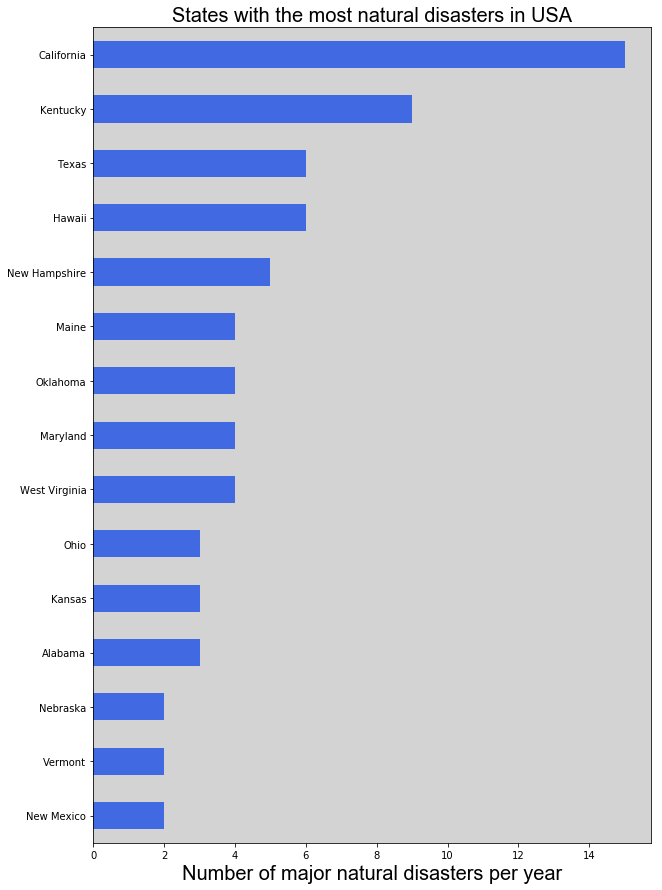

In [46]:
#California is the state that appears most of the times
#df.Region.value_counts(ascending=True).plot(kind='barh', figsize=(4,13))
ca = df.Region.value_counts(ascending=True).tail(15).plot(kind='barh', color='royalblue', figsize=(10,15))
ca.set_title("States with the most natural disasters in USA", fontsize=20,fontname="Arial Unicode MS")
ca.set_xlabel('Number of major natural disasters per year',fontsize=20,fontname="Arial Unicode MS")
ca.set_facecolor("lightgrey")


In [47]:
counts = df.Region.value_counts(ascending=True)
counts

New York                     1
South Dakota                 1
December                     1
Utah                         1
Alaska                       1
Wyoming                      1
Northern Mariana Islands     1
Mississippi                  1
Hampshire                    1
Nevada                       1
Colorado Lake                1
American Samoa               2
Arizona                      2
Oregon                       2
North Carolina               2
Massachusetts                2
Pueblo of Acoma              2
New Jersey                   2
Colorado                     2
Indiana                      2
New Mexico                   2
Vermont                      2
Nebraska                     2
Alabama                      3
Kansas                       3
Ohio                         3
West Virginia                4
Maryland                     4
Oklahoma                     4
Maine                        4
New Hampshire                5
Hawaii                       6
Texas   

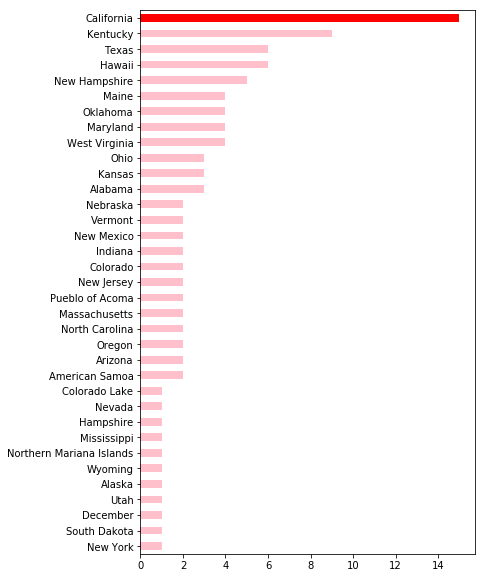

In [48]:
def get_color(Region):
    if Region == "California":
        return 'red'
    else:
        return 'pink'

bar_colors = [get_color(name) for name in counts.index]
counts.plot(kind='barh', color=bar_colors, figsize=(6,10), legend=False)


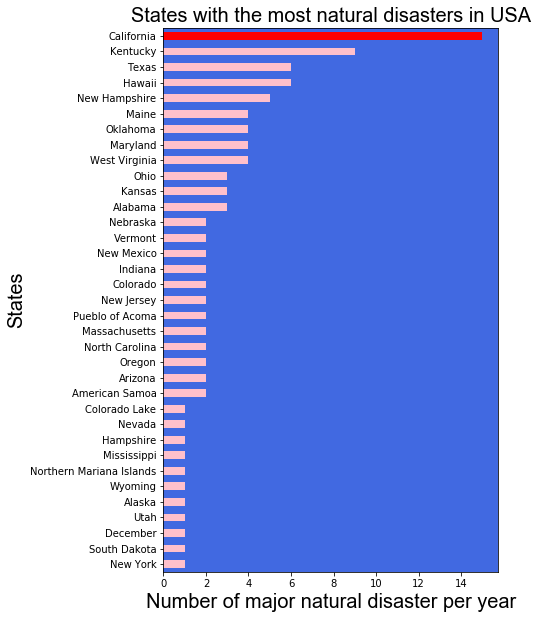

In [49]:
counts.plot(kind='barh', color=bar_colors, figsize=(9,10), legend=False)
pr = counts.plot(kind='barh', color=bar_colors, figsize=(6,10), legend=False)
pr.set_title("States with the most natural disasters in USA", fontsize=20,fontname="Arial Unicode MS")
pr.set_ylabel('States',fontsize=20,fontname="Arial Unicode MS")
pr.set_xlabel('Number of major natural disaster per year',fontsize=20,fontname="Arial Unicode MS")
pr.set_facecolor("royalblue")

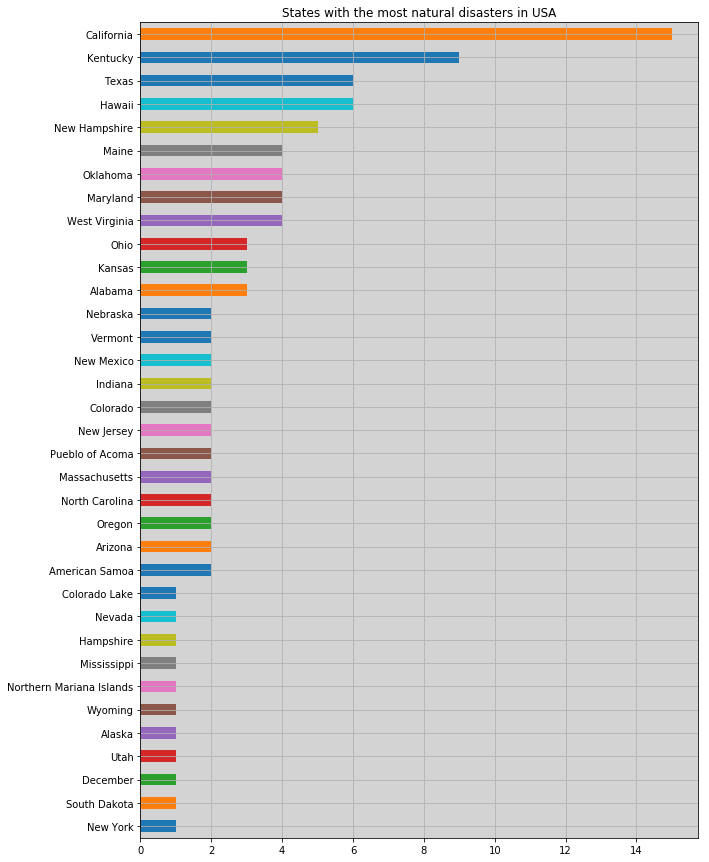

In [50]:
#hmm, seems that grid is not the right option for this chart
df.Region.value_counts(ascending=True).plot(kind='barh',figsize=(4,13))
ca = df.Region.value_counts(ascending=True).plot(kind='barh',figsize=(10,15))
ca.set_title("States with the most natural disasters in USA")

ca.grid()
ca.set_facecolor("lightgrey")

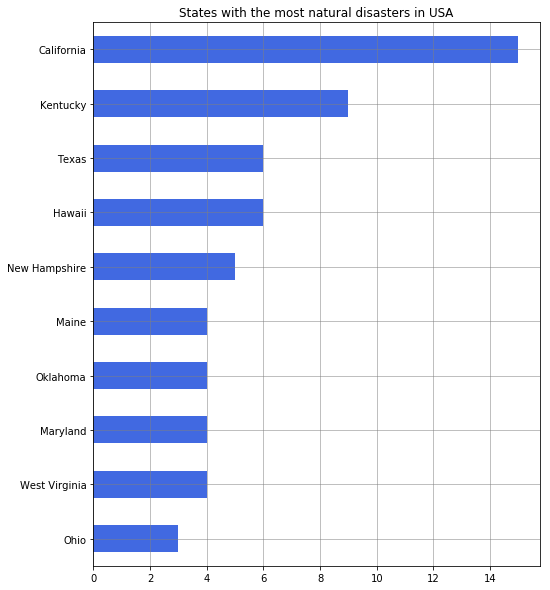

In [51]:
#More testing
df.Region.value_counts(ascending=True).plot(kind='barh', color='royalblue', figsize=(4,13))
ca = df.Region.value_counts(ascending=True).tail(10).plot(kind='barh', color='royalblue',figsize=(8,10))
ca.set_title("States with the most natural disasters in USA")

ca.grid()
ca.grid(linestyle='-', linewidth=0.5, color='grey')

In [ ]:
# #More testing
# df.Region.value_counts(ascending=True).plot(kind='barh',figsize=(4,13))
# ca = df.Region.value_counts(ascending=True).plot(kind='barh',figsize=(5,17))
# ca.set_title("States with the most natural disasters in USA")

# ca.grid()
# #ca.grid(linestyle='-', linewidth=1, color='grey')
# ca.set_facecolor("grey")

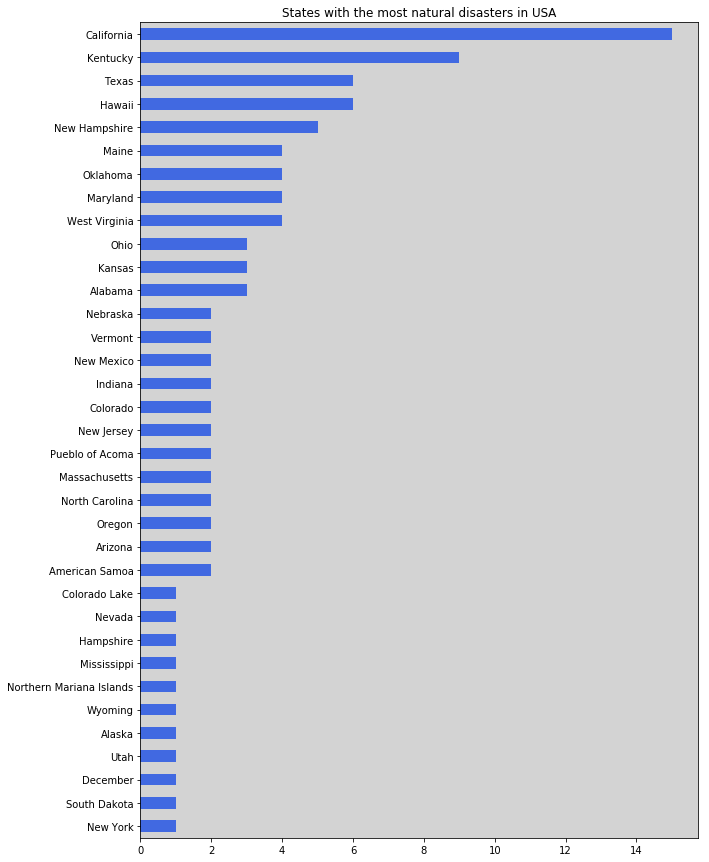

In [52]:
df.Region.value_counts(ascending=True).plot(kind='barh', color='royalblue', figsize=(4,13))
ca = df.Region.value_counts(ascending=True).plot(kind='barh', color='royalblue', figsize=(10,15))
ca.set_title("States with the most natural disasters in USA")
ca.set_facecolor("lightgrey")

In [53]:
#idea to add the "count" as a separate column in order to have some numerical data
#but, then I had to merge it with the original dataframe
new_table=df.Region.value_counts().reset_index(name = 'Count_of_disasters_per_region')

In [54]:
new_table

,index,Count_of_disasters_per_region
0,California,15
1,Kentucky,9
2,Texas,6
3,Hawaii,6
4,New Hampshire,5
5,Maine,4
6,Oklahoma,4
7,Maryland,4
8,West Virginia,4
9,Ohio,3


In [ ]:
#df['Count_of_disasters_per_region'] = 

In [55]:
df.Type_incident.value_counts()

Flooding                18
Severe storm            14
Wildfire                12
Fire                     7
Mudslides                3
Severe storm             3
Landslides               3
Hurricane                2
Snowstorm                2
Tornadoes                2
Severe Storm             2
Tropical storm Gita      2
Mudslide                 2
Severe winter storm      2
Creek fire               2
Landslide                2
Severe winter storm      2
Graham fire              2
Typhoon Soudelor         1
Tornado                  1
Pawnee fire              1
Spring creek fire        1
Straight-line winds      1
Dollarl Ridge Fire       1
Tinder Fire              1
Debris flows             1
Christine fire           1
Holiday Fire             1
Volcanic eraption        1
Mudflows                 1
West Fire                1
Klamathon fire           1
Chateau fire             1
Soldier Canyon fire      1
Earthquake               1
Straight line winds      1
Name: Type_incident, dtype: 

In [56]:
df.Type_of_disaster.value_counts()

Fire                   33
Storm                  24
Flooding               18
Landslides              5
Mudslides               4
Hurricane               2
Snowstorm               2
Tornadoes               2
Straight-line winds     2
Storm New               1
Mudslide                1
Storm Alaska            1
Volcanic eraption       1
Debris flows            1
Typhoon                 1
Earthquake              1
Tornado                 1
Mudflows                1
Name: Type_of_disaster, dtype: int64

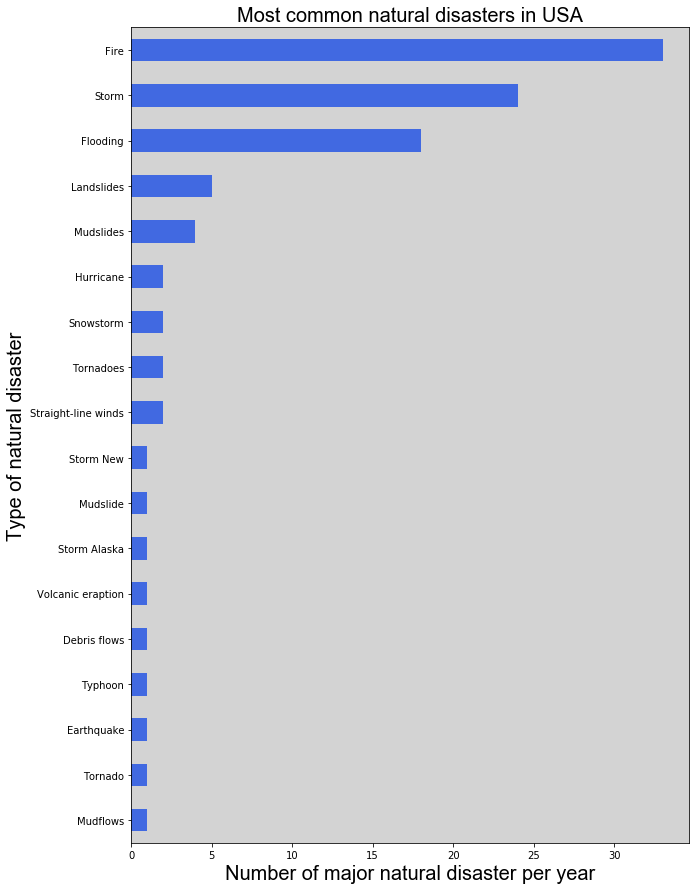

In [57]:
df.Type_of_disaster.value_counts(ascending=True).plot(kind='barh',figsize=(9,10))
dis = df.Type_of_disaster.value_counts(ascending=True).plot(kind='barh', color="royalblue", figsize=(10,15))
dis.set_title("Most common natural disasters in USA", fontsize=20,fontname="Arial Unicode MS")
dis.set_ylabel('Type of natural disaster',fontsize=20,fontname="Arial Unicode MS")
dis.set_xlabel('Number of major natural disaster per year',fontsize=20,fontname="Arial Unicode MS")
dis.set_facecolor("lightgrey")


In [58]:
df.sort_values(by='Region')

,Type_of_disaster,Region,Month,Year,Type_incident
96,Hurricane,Alabama,October,2017,Hurricane
48,Storm,Alabama,March,2018,Severe storm
49,Tornadoes,Alabama,March,2018,Tornadoes
87,Storm,Alaska,September,2017,Severe storm
72,Storm,American Samoa,February,2018,Tropical storm Gita
73,Storm,American Samoa,February,2018,Tropical storm Gita
35,Fire,Arizona,May,2018,Wildfire
47,Fire,Arizona,April,2018,Tinder Fire
0,Fire,California,July,2018,Holiday Fire
80,Fire,California,December,2017,Wildfire


In [59]:
#check what is different when I put "ascending=False"
df.sort_values(by='Type_of_disaster').plot

In [60]:
#hist, not the appropriate form when non numerical values
df.sort_values(by='Type_of_disaster').hist

<bound method hist_frame of        Type_of_disaster                    Region      Month          Year  \
83         Debris flows                California   December          2017   
37           Earthquake                    Hawaii        May          2018   
0                  Fire                California       July          2018   
20                 Fire                    Oregon       June          2018   
21                 Fire                    Oregon       June          2018   
46                 Fire                     Texas        May          2018   
23                 Fire                   Wyoming       June          2018   
80                 Fire                California   December          2017   
71                 Fire                  Oklahoma      March          2018   
31                 Fire                New Mexico       June          2018   
32                 Fire                New Mexico        May          2018   
65                 Fire             

In [61]:
figsize=(4,13)

In [62]:
df.groupby('Region').Type_of_disaster.value_counts(ascending=False).sort_values(ascending=False)

Region                    Type_of_disaster   
California                Fire                   12
Texas                     Fire                    4
Oklahoma                  Fire                    4
Maine                     Flooding                2
New Hampshire             Storm                   2
Kentucky                  Storm                   2
New Hampshire             Flooding                2
Oregon                    Fire                    2
Kentucky                  Flooding                2
Colorado                  Fire                    2
Kentucky                  Landslides              2
                          Mudslides               2
Arizona                   Fire                    2
American Samoa            Storm                   2
Maryland                  Storm                   2
                          Flooding                2
Maine                     Storm                   2
New Mexico                Fire                    2
Hawaii            

In [ ]:
# #more complicated way
# ax = df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_of_disaster', kind='barh', color="green", figsize=(10,15))
# ax.set_title("Regions with the most disasters in USA")
# ax.set_ylabel('Region & Type of natural disaster',fontsize=18,fontname="Arial Unicode MS")
# ax.set_xlabel('Number of major natural disaster per year',fontsize=18,fontname="Arial Unicode MS")
# ax.set_facecolor("lightgrey")

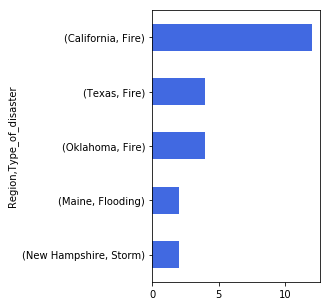

In [63]:
df.groupby('Region').Type_of_disaster.value_counts().sort_values(ascending=True,na_position='first').tail(5).plot(x='Region', y='Type_of_disaster', kind='barh', color ="royalblue", figsize=(3,5))

In [64]:
df.groupby('Region').Type_incident.value_counts()

Region                    Type_incident      
Alabama                   Hurricane              1
                          Severe storm           1
                          Tornadoes              1
Alaska                    Severe storm           1
American Samoa            Tropical storm Gita    2
Arizona                   Tinder Fire            1
                          Wildfire               1
California                Wildfire               7
                          Creek fire             1
                          Debris flows           1
                          Flooding               1
                          Holiday Fire           1
                          Klamathon fire         1
                          Mudflows               1
                          Pawnee fire            1
                          West Fire              1
Colorado                  Chateau fire           1
                          Spring creek fire      1
Colorado Lake             Christine 

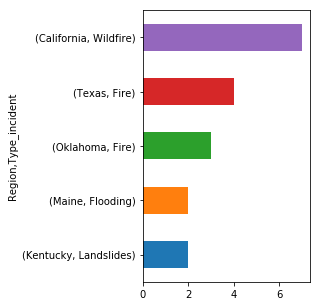

In [65]:
df.groupby('Region').Type_incident.value_counts().sort_values(ascending=True,na_position='first').tail(5).plot(x='Region', y='Type_incident', kind='barh',figsize=(3,5))

In [ ]:
df.groupby('Region').Type_incident.value_counts().sort_values(ascending=True,na_position='first').plot(x='Region', y='Type_incident', kind='barh',figsize=(4,17))